# Time series forecasting fundamentals with TensorFlow + Milestone Project : BitPredict:

Let's write some TensorFlow code to predict of Bitcoin based on the historical price of Bitcoin



**Note:** This is not financial advise

## Get Data

We're going to be using the historical price of data of bitcoin to try and predict the future price of Bitcoin, we downloaded the data from here: https://finance.yahoo.com/quote/BTC-USD/history/?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAAMg4e827RxxTb8gcFMZ85X7eM53YoiBubLyDgDbMzC9hvRPqktBvL5tJ34mtIHHY3alVL2B7fkRwZpUrDPoNbbrdrQlDCCMmj3mP0coOOPW3riEDpiBOMDtZOGh3o6QxwHKWQQrQp97uV83NScByTp0QYfAWKqaWyDjrF-IEzA9X&period1=1410912000&period2=1714991988

In [ ]:
# THis is old data from github till 2021-05-18 but we will use latest from yahoo finance
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2024-05-12 11:10:36--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.01s   

2024-05-12 11:10:37 (11.4 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



## Importing timeseries with pandas


In [ ]:
# Import with pandas
import pandas as pd
# Let's read in our Bitcoin data and parse the dates
df = pd.read_csv("/content/BTC-USD.csv",
                 parse_dates=["Date"],
                 index_col=["Date"]) # Parse the date column and tell pandas column1 is date

df.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3520 entries, 2014-09-17 to 2024-05-06
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3520 non-null   float64
 1   High       3520 non-null   float64
 2   Low        3520 non-null   float64
 3   Close      3520 non-null   float64
 4   Adj Close  3520 non-null   float64
 5   Volume     3520 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 192.5 KB


In [ ]:
# How many samples do we have
len(df)

3520

In [ ]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-02,58253.703125,59602.296875,56937.203125,59123.433594,59123.433594,32711813559
2024-05-03,59122.300781,63320.503906,58848.312500,62889.835938,62889.835938,33172023048
2024-05-04,62891.031250,64494.957031,62599.351563,63891.472656,63891.472656,20620477992
2024-05-05,63892.453125,64610.890625,62955.304688,64031.132813,64031.132813,18296164805
2024-05-06,64032.632813,65425.679688,63752.597656,64601.843750,64601.843750,21053020160


We've collected the historical price of Bitcoin for the past almost ~10 years but there's 3520 samples only.

Typically deep learning models usually like lots and lots and lots of samples (where lots and lots can be thousands to ten of thousands to millions)

A smaller number of samples is something you'll often run into with time series data problems.

> **Note:** The **Seasonality** of a time series dataset is referred as the number of samples per Year. So for our Bitcoin data, it has a seasonality of daily or value of 365 because we collect one sample per day mean we collect 365 per year.

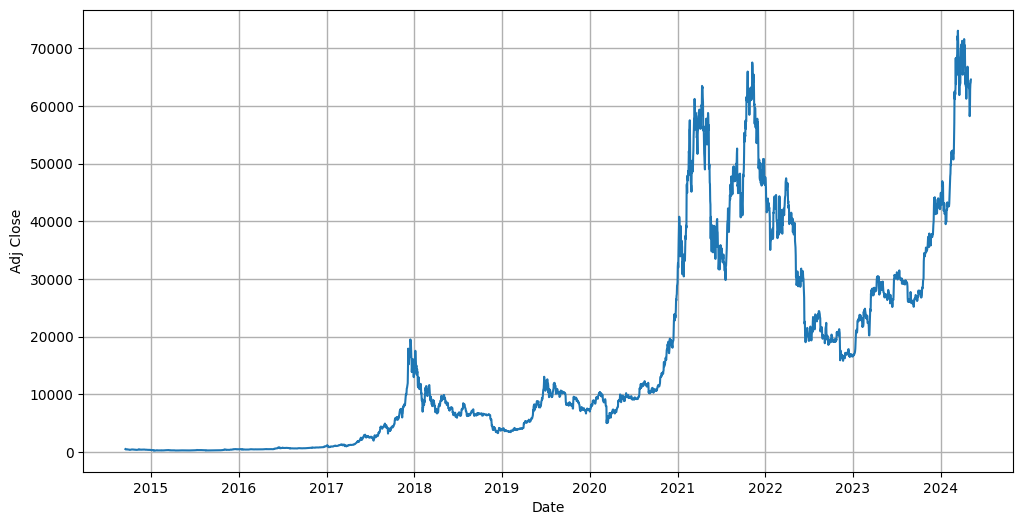

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# import cufflinks as cf
# # !pip install plotly
# from plotly import init_notebook_mode, plot, iplot
# init_notebook_mode(connected=True)
# cf.go_offline()


plt.figure(figsize=(12,6))
sns.lineplot(x="Date", y='Adj Close', data=df)
plt.grid(linestyle='-', linewidth=1)

In [ ]:
# Only want closing price for each day
bitcoin_prices = pd.DataFrame(df["Adj Close"]).rename(columns={"Adj Close": "Price"})

bitcoin_prices.head()

,Price
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


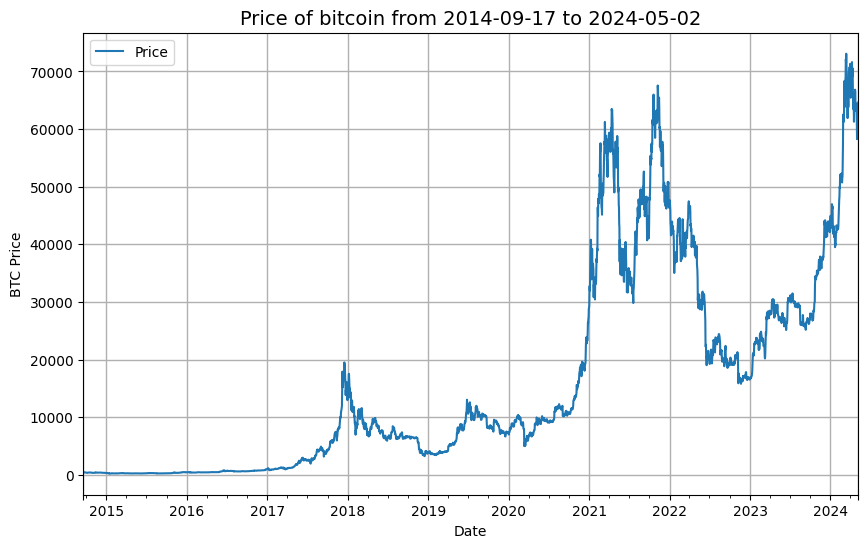

In [ ]:
bitcoin_prices.plot(figsize=(10,6))
plt.ylabel("BTC Price")
plt.title("Price of bitcoin from 2014-09-17 to 2024-05-02", fontsize=14)
plt.grid(linestyle='-', linewidth=1)

## Importaing time series data with Python's CSV module


In [ ]:
# Importing and formatting historical data of Bitcoin with Python
import csv
from datetime import datetime

timesteps = []
btc_price = []

with open("/content/BTC-USD.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=',')
  next(csv_reader) # Skip first line (this gets rid of column title)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[0], "%Y-%m-%d")) #get the dates as dates not strings
    btc_price.append(float(line[5])) #get the closing price as float

# View first 10 of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2014, 9, 17, 0, 0),
  datetime.datetime(2014, 9, 18, 0, 0),
  datetime.datetime(2014, 9, 19, 0, 0),
  datetime.datetime(2014, 9, 20, 0, 0),
  datetime.datetime(2014, 9, 21, 0, 0),
  datetime.datetime(2014, 9, 22, 0, 0),
  datetime.datetime(2014, 9, 23, 0, 0),
  datetime.datetime(2014, 9, 24, 0, 0),
  datetime.datetime(2014, 9, 25, 0, 0),
  datetime.datetime(2014, 9, 26, 0, 0)],
 [457.334015,
  424.440002,
  394.79599,
  408.903992,
  398.821014,
  402.152008,
  435.790985,
  423.204987,
  411.574005,
  404.424988])

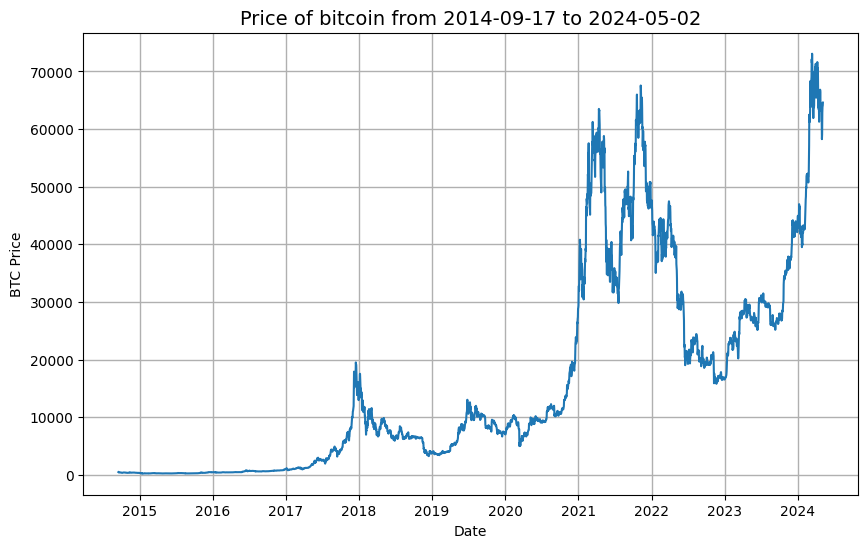

In [ ]:
# let's plot from CSV
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(timesteps, btc_price)
plt.ylabel("BTC Price")
plt.xlabel("Date")
plt.title("Price of bitcoin from 2014-09-17 to 2024-05-02", fontsize=14)
plt.grid(linestyle='-', linewidth=1)

## Format data part 1: Create Train and Test sets of our time series data

### Creating train and test sets with timeseries data (wrong way)

In [ ]:
bitcoin_prices[:5]

,Price
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


In [ ]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2014-09-17T00:00:00.000000000', '2014-09-18T00:00:00.000000000',
        '2014-09-19T00:00:00.000000000', '2014-09-20T00:00:00.000000000',
        '2014-09-21T00:00:00.000000000', '2014-09-22T00:00:00.000000000',
        '2014-09-23T00:00:00.000000000', '2014-09-24T00:00:00.000000000',
        '2014-09-25T00:00:00.000000000', '2014-09-26T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([457.334015, 424.440002, 394.79599 , 408.903992, 398.821014,
        402.152008, 435.790985, 423.204987, 411.574005, 404.424988]))

In [ ]:
# Wrong way to make train/test sets for time series data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps, # Dates
                                                    prices, # BTC price,
                                                    test_size=0.2,
                                                    random_state=42)


X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2816,), (704,), (2816,), (704,))

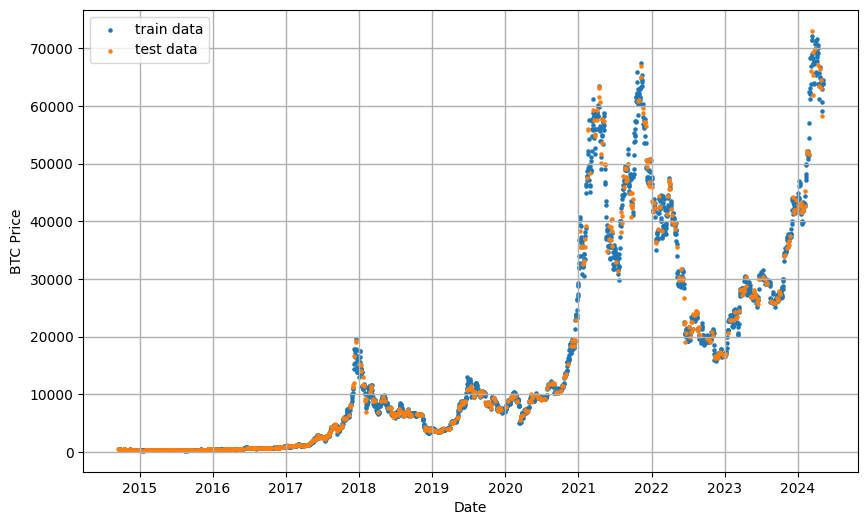

In [ ]:
# Let's plot the wrong train test splits
plt.figure(figsize=(10,6))
plt.scatter(X_train, y_train, s=5, label="train data")
plt.scatter(X_test, y_test, s=5, label="test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.grid(linestyle='-', linewidth=1)
plt.legend()
plt.show();

### Create Train and Test sets for time series (the right way)

In [ ]:
# Create train and test splits the right way for time series

split_size = int(0.8 * len(prices)) # 80% train, 20% test - you can change these values as needed eg.90/10

# Create train data splits (everyting before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2816, 704, 2816, 704)

## Create a plotting function
Typing plotting code is tedious, let's functionize it.

In [ ]:
# Create function to plot time series data
def plot_time_series(timesteps, values, format='.',start=0, end=None, label=None):
  """
  Plots timestep (a series of points in time) against values(a series of values accross)

  Parameters:
  ----------
  timesteps : array of timesteps values
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot(setting a value will index from start of timesteps & values)
  end : where to end the plot(similar to start but for the end)
  label : label to show on plot about values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # Make label bigger
  plt.grid(True)

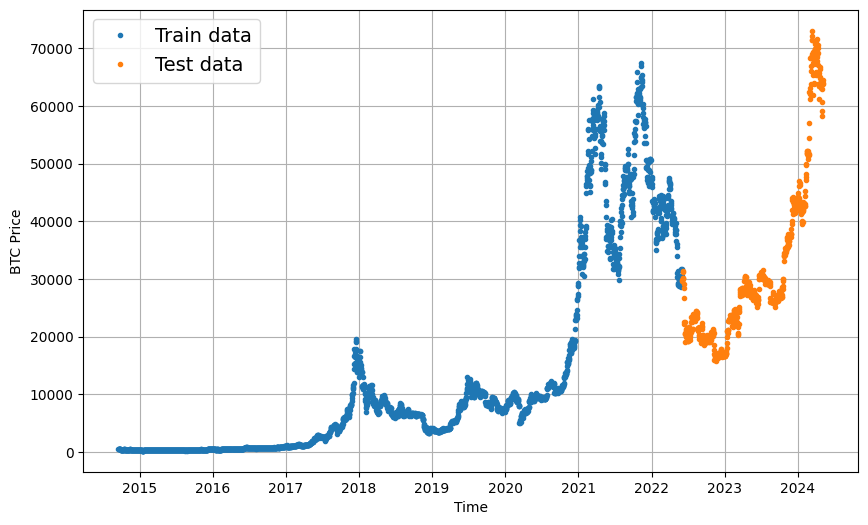

In [ ]:
# Test our our function
plt.figure(figsize=(10,6))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")


## Modelling Experiments

We've got some Bitcoin historical data, to model it, let's a series of modelling experiements and see which model performs best


Terms to be familiar with:
* **Horizon** = number of timesteps into the future we're going to predict
* **Window size** = number of timesteps we're going to use to predict **Horizon**.

Modelling experiemnts we are running

* 0 Naive model (baseline)

* 1 Dense model, horizon=1 , window=7

* 2 Same as 1 model, horizon=1 , window=30

* 3 Same as 1 model, horizon=7 , window=30

* 4 Conv1D

* 5 LSTM

* 6 Same as 1 model but with multivariate data

* 7 N-BEATs Algorithm

* 8 Ensemble (Multiple models optimized on different loss functions)

* 9 Future prediction model (model to predict future values)

* 10 Same as model 1 (but with turkey data intoduced)

## Model 0: Naive forecast(baseline)

The formula looks like this:

$$\hat{y}_{t} = y_{t-1}$$

In English:

> The prediction at timestep t (y-hat) is equal to the value at timestep t-1 (previously timestep) - This is for a horizon of 1

In [ ]:
# Create a naive forecast
naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([29704.390625, 29832.914063, 29906.662109, 31370.671875,
        31155.478516, 30214.355469, 30111.998047, 29083.804688,
        28360.810547, 26762.648438]),
 array([63755.320313, 63419.140625, 63113.230469, 63841.121094,
        60636.855469, 58254.011719, 59123.433594, 62889.835938,
        63891.472656, 64031.132813]))

In [ ]:
y_test[-10:]

array([63419.140625, 63113.230469, 63841.121094, 60636.855469,
       58254.011719, 59123.433594, 62889.835938, 63891.472656,
       64031.132813, 64601.84375 ])

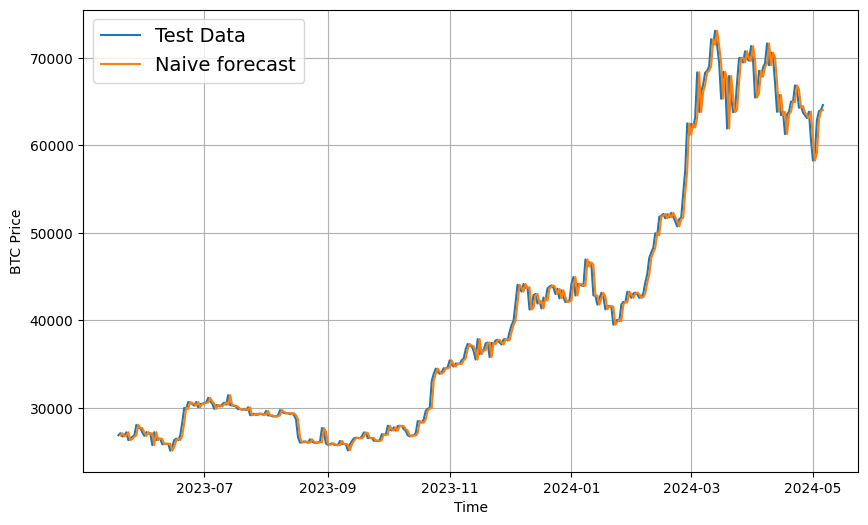

In [ ]:
# Plot naive forecast
plt.figure(figsize=(10,6))
# plot_time_series(timesteps=X_train, values=y_train, label="Train Data")
plot_time_series(timesteps=X_test, values=y_test, format="-",start=350, label="Test Data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", start=350, label="Naive forecast")

## Evaluating a time series model

Let's look into some evaluation metrics for time series forecasting.

* What are we doing?
> We are predicting a number, so that means we have a form of a regression problem.

Because we're working on a regression problem, we'll need some regression-like metrics.

A few common regression metrics (which can also be used for time series forecasting):
* MAE - mean absolute error
* MSE - mean squared error
* RMSE - root mean squared error
* MAPE/sMAPE - (symmetric) mean absolute percentage error
* MASE - mean absolute scaled error

for all of the above metrics, **lower is better**, for example, an MAE of 0 that is better than MAE of 100.

The main thing we're evaluating here is: **how do our model's forecasts (y_pred) compare against the actual values (y_true or ground truth values)**

In [ ]:
import tensorflow as tf


In [ ]:
# MASE implemented courtesy of sktime - https://github.com/alan-turing-institute/sktime/blob/ee7a06843a44f4aaec7582d847e36073a9ab0566/sktime/performance_metrics/forecasting/_functions.py#L16
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

In [ ]:
mean_absolute_scaled_error(y_true=y_test[1:], y_pred=naive_forecast).numpy()

0.9988845881520174

In [ ]:
# Creating a function to evaluate the metrics

def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}




That's one good looking good evaluation function

Let's see how it works

In [ ]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 594.72266,
 'mse': 991585.25,
 'rmse': 995.78375,
 'mape': 1.8197414,
 'mase': 0.9988847}

In [ ]:
tf.reduce_mean(y_test)

<tf.Tensor: shape=(), dtype=float64, numpy=31317.773454228693>

In [ ]:
tf.reduce_min(y_test), tf.reduce_max(y_test)

(<tf.Tensor: shape=(), dtype=float64, numpy=15787.28418>,
 <tf.Tensor: shape=(), dtype=float64, numpy=73083.5>)

In [ ]:
594 / 31317 * 100

1.8967334035827188

## Format Data part 2: Windowing our dataset

We window our time series dataset to turn our data into a supervised learning problem.

```
Windowing For One Week
[0, 1, 2, 3, 4, 5, 6] -> [7]
[1, 2, 3, 4, 5, 6, 7] -> [8]
[2, 3, 4, 5, 6, 7, 8] -> [9]
```

In [ ]:
# What we want to do with our bitcoin data
print(f"We want to use: {btc_price[:7]} to predict this: {btc_price[7]}")

We want to use: [457.334015, 424.440002, 394.79599, 408.903992, 398.821014, 402.152008, 435.790985] to predict this: 423.204987


In [ ]:
# Let's some global variables for window and horizon size
HORIZON = 1 # Predict next one day
WINDOW_SIZE = 7 # Use to past week of data for prediction



In [ ]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=HORIZON):
  """
  Creates labels for windowed dataset.

  e.g if horizon=1
  Input: [0, 1, 2, 3, 4, 5, 6, 7] -> Output: [0, 1, 2, 3, 4, 5, 6], [7]
  """
  return x[:, :-horizon], x[:, -horizon:]

In [ ]:
# LEt's test out windowed labelling funct
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8), axis=0))
print(f"Winodw: {tf.squeeze(test_window).numpy()}, Label-> {tf.squeeze(test_label).numpy()}")

Winodw: [0 1 2 3 4 5 6], Label-> 7


We've got a way to labelled our windowed data.

However, this works only on small data.

We need a way to do the above across our entire time series


We could do this with Python for loops, however, for large time series, that'd be quite slow.

To speed things up, we'll leverage Numpy's array indexing


Our function will:
1. Create a window step of specific window size (e.g. [0, 1, 2, 3, 4, 5, 6])
2. Use NumPy indexing to create 2D array of multiple window steps, for example:

```
[[0, 1, 2, 3, 4, 5, 6]
[1, 2, 3, 4, 5, 6, 7]
[2, 3, 4, 5, 6, 7, 8]]
```
3. Uses 2D array of multiple window steps (from 2.) to index on a target series (e.g. the historical price of bitcoin)
4. Uses our `get_labelled_windows()` function we created above to turn the window steps into windows with  a specified horizon

In [ ]:
import numpy as np

# Create function to view NumPy array as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  """
  Turns 1D array into a 2D array of sequential labelled windows of window_size with horizon size labels.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for labelling later)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  # 2. Create a 2D array of multiple window steps (-1 to account for 0 indexing)
  window_indexes  = window_step + np.expand_dims(np.arange(len(x) - (window_size+horizon-1)), axis=0).T

  # print(f"Window indexes:\n {window_indexes, window_indexes.shape}")

  # 3. Index on the target array (a time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled window
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)
  return windows, labels

In [ ]:

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(3513, 3513)

In [ ]:
# View the first 3 window/labels
for i in range(3):
  print(f"Window: {full_windows[i]}\n-> Labels: {full_labels[i]}")

Window: [457.334015 424.440002 394.79599  408.903992 398.821014 402.152008
 435.790985]
-> Labels: [423.204987]
Window: [424.440002 394.79599  408.903992 398.821014 402.152008 435.790985
 423.204987]
-> Labels: [411.574005]
Window: [394.79599  408.903992 398.821014 402.152008 435.790985 423.204987
 411.574005]
-> Labels: [404.424988]


In [ ]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]}\n -> Labels: {full_labels[i-3]}")

Window: [63419.140625 63113.230469 63841.121094 60636.855469 58254.011719
 59123.433594 62889.835938]
 -> Labels: [63891.472656]
Window: [63113.230469 63841.121094 60636.855469 58254.011719 59123.433594
 62889.835938 63891.472656]
 -> Labels: [64031.132813]
Window: [63841.121094 60636.855469 58254.011719 59123.433594 62889.835938
 63891.472656 64031.132813]
 -> Labels: [64601.84375]


## Turning Windows into train and test sets

In [ ]:
# Make the train test split
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and tests splits
  """
  split_size = int(len(windows) * (1-test_split))# this will default 80% train/ 20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]

  return train_windows, test_windows, train_labels, test_labels



In [ ]:
# Create train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2810, 703, 2810, 703)

In [ ]:
train_windows[:5], train_labels[:5]

(array([[457.334015, 424.440002, 394.79599 , 408.903992, 398.821014,
         402.152008, 435.790985],
        [424.440002, 394.79599 , 408.903992, 398.821014, 402.152008,
         435.790985, 423.204987],
        [394.79599 , 408.903992, 398.821014, 402.152008, 435.790985,
         423.204987, 411.574005],
        [408.903992, 398.821014, 402.152008, 435.790985, 423.204987,
         411.574005, 404.424988],
        [398.821014, 402.152008, 435.790985, 423.204987, 411.574005,
         404.424988, 399.519989]]),
 array([[423.204987],
        [411.574005],
        [404.424988],
        [399.519989],
        [377.181   ]]))

In [ ]:
test_windows[:5], test_labels[:5]

(array([[28814.900391, 29445.957031, 31726.390625, 31792.310547,
         29799.080078, 30467.488281, 29704.390625],
        [29445.957031, 31726.390625, 31792.310547, 29799.080078,
         30467.488281, 29704.390625, 29832.914063],
        [31726.390625, 31792.310547, 29799.080078, 30467.488281,
         29704.390625, 29832.914063, 29906.662109],
        [31792.310547, 29799.080078, 30467.488281, 29704.390625,
         29832.914063, 29906.662109, 31370.671875],
        [29799.080078, 30467.488281, 29704.390625, 29832.914063,
         29906.662109, 31370.671875, 31155.478516]]),
 array([[29832.914063],
        [29906.662109],
        [31370.671875],
        [31155.478516],
        [30214.355469]]))

In [ ]:
# Check to see if train labels are the same and after window split
np.array_equal(np.squeeze(train_labels[:-HORIZON]), y_train[WINDOW_SIZE:])

True

## Make a modelling checkpoint

Because our model's performance will flunctuate from experiment to experiment, we're going to write a model checkpoint so we can compare apples to apples.

More specifically, we want to compare each of our model's best performances against the other model's best performances.

For example if our model performs the best on epoch 55 (but we're training for 100 epochs), we want to load and evaluate the model saved on epoch 55.


we can create modelling callback

In [ ]:
import os

# Create a function to implement a ModelCheckPoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            monitor="val_loss",
                                            verbose= 0, # only output a limited amount of text
                                            save_best_only=True)

## Model 1: Dense model (window=7, horizon=1)

Our first deep model is going to simple dense model:
* A single dense layer with 128 hidden units and ReLU
* An output layer with linear activation (no activation)
* Adam optimization and MAE loss function
* Batch size of 128(previously we've used 32)
* 100 epochs

Why these values?

I picked them out of experimentation.

* **Hyperparameters** = values a machine learning practitioner (you) can adjust themselves

* **Parameters** = values a model learns on it's own

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# set random seed for reproducible results as possible
tf.random.set_seed(42)


# 1. Create a model
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"), # linear activation is the as no activation
    layers.Dense(HORIZON, activation="linear")
],  name = "model_1_dense")#Name our model so we can save it

# 2. Compile the model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

# 3. Fit the model
model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
22/22 [==============================] - 3s 37ms/step - loss: 4191.7632 - mae: 4191.7632 - mse: 78790864.0000 - val_loss: 3981.9617 - val_mae: 3981.9617 - val_mse: 21172558.0000
Epoch 2/100
22/22 [==============================] - 1s 31ms/step - loss: 811.2338 - mae: 811.2338 - mse: 2913349.2500 - val_loss: 1053.0470 - val_mae: 1053.0470 - val_mse: 2495716.2500
Epoch 3/100
22/22 [==============================] - 0s 5ms/step - loss: 616.6220 - mae: 616.6220 - mse: 1698684.5000 - val_loss: 1090.7804 - val_mae: 1090.7804 - val_mse: 2726840.0000
Epoch 4/100
22/22 [==============================] - 0s 21ms/step - loss: 573.7301 - mae: 573.7301 - mse: 1517325.6250 - val_loss: 944.1735 - val_mae: 944.1735 - val_mse: 2104212.2500
Epoch 5/100
22/22 [==============================] - 0s 21ms/step - loss: 545.8882 - mae: 545.8882 - mse: 1368187.1250 - val_loss: 921.7095 - val_mae: 921.7095 - val_mse: 1970199.5000
Epoch 6/100
22/22 [==============================] - 0s 20ms/step - los

In [ ]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

22/22 [==============================] - 0s 2ms/step - loss: 638.6661 - mae: 638.6661 - mse: 1066492.8750


[638.6661376953125, 638.6661376953125, 1066492.875]

In [ ]:
# Load in the saved best performing model
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)

22/22 [==============================] - 0s 2ms/step - loss: 593.0860 - mae: 593.0860 - mse: 987310.6250


[593.0859985351562, 593.0859985351562, 987310.625]

In [ ]:
naive_results

{'mae': 594.72266,
 'mse': 991585.25,
 'rmse': 995.78375,
 'mape': 1.8197414,
 'mase': 0.9988847}

## Making forecasts with a model (on test data set)

To make "forecast" on test dataset (note: these won't be actual forecasts, they're only psuedo forecasts because actual forecasts are into the future), let's write a function to:

1. take in train model
2. takes in some input data(same kind of data model was trained on)
3. passes the input data to model's `predict()` method
4. returns the predition


In [ ]:
# Helper function for predictons
def make_preds(model, input_data):
  """
  Uses model to make predictions input_data.

  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions


In [ ]:
# Make predictions using model_1 on the test dataset view the results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

22/22 [==============================] - 0s 1ms/step


(703,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([29880.281, 29804.854, 29934.494, 31151.367, 31296.834, 30356.863,
        30168.752, 29237.941, 28435.125, 26933.498], dtype=float32)>)

In [ ]:
tf.squeeze(test_labels).shape, model_1_preds.shape

(TensorShape([703]), TensorShape([703]))

In [ ]:
model_1_results = evaluate_preds(tf.squeeze(test_labels), model_1_preds)
model_1_results

{'mae': 593.0861,
 'mse': 987310.6,
 'rmse': 993.6351,
 'mape': 1.8394638,
 'mase': 0.99613595}

In [ ]:
naive_results

{'mae': 594.72266,
 'mse': 991585.25,
 'rmse': 995.78375,
 'mape': 1.8197414,
 'mase': 0.9988847}

In [ ]:
X_test[:10]

array(['2022-06-03T00:00:00.000000000', '2022-06-04T00:00:00.000000000',
       '2022-06-05T00:00:00.000000000', '2022-06-06T00:00:00.000000000',
       '2022-06-07T00:00:00.000000000', '2022-06-08T00:00:00.000000000',
       '2022-06-09T00:00:00.000000000', '2022-06-10T00:00:00.000000000',
       '2022-06-11T00:00:00.000000000', '2022-06-12T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [ ]:
X_test[-len(test_windows):10]

array(['2022-06-04T00:00:00.000000000', '2022-06-05T00:00:00.000000000',
       '2022-06-06T00:00:00.000000000', '2022-06-07T00:00:00.000000000',
       '2022-06-08T00:00:00.000000000', '2022-06-09T00:00:00.000000000',
       '2022-06-10T00:00:00.000000000', '2022-06-11T00:00:00.000000000',
       '2022-06-12T00:00:00.000000000'], dtype='datetime64[ns]')

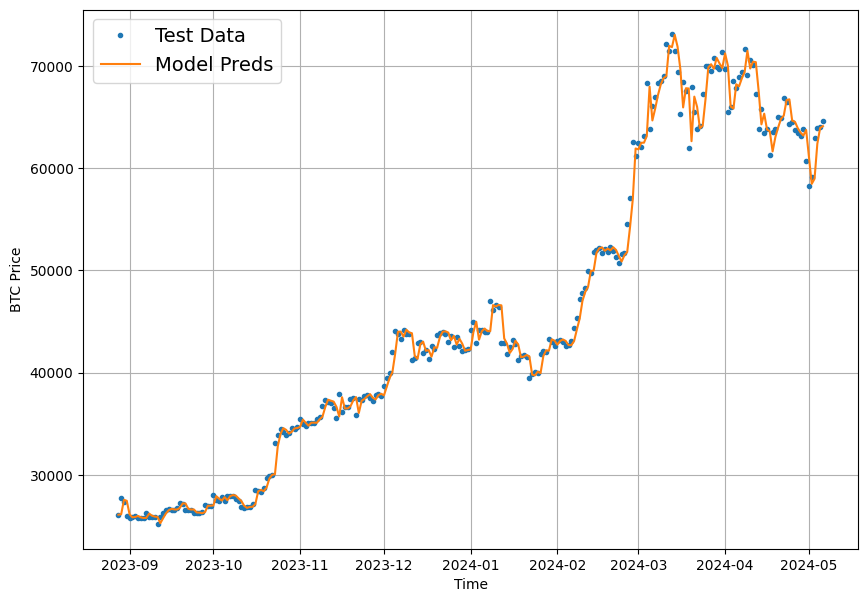

In [ ]:
# let's plot our model_1 predictions
offset = 450
plt.figure(figsize=(10,7))

# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:,0],
                 start=offset,
                 label="Test Data")

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_1_preds,
                 start=offset,
                 format='-',
                 label="Model Preds")

We are working on Autoregressive data time series, its mean we can see slightly lag between actual values and predicted values because in autoregression the next predicted values are the output of previous predicted steps

## Model 2: Dense(window=30, horizon=1)

In [ ]:
HORIZON = 1 # Predict one step at a time (one day of Bitcoin price)
WINDOW_SIZE = 30 # use the 30 timestesp in past

In [ ]:
# Make windows data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(3490, 3490)

In [ ]:
# Make train and test windows
train_windows, test_windows, train_labels, test_labels =  make_train_test_splits(windows=full_windows, labels=full_labels,
                                                                                 test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2792, 698, 2792, 698)

In [ ]:
train_windows[:3], train_labels[:3]

(array([[457.334015, 424.440002, 394.79599 , 408.903992, 398.821014,
         402.152008, 435.790985, 423.204987, 411.574005, 404.424988,
         399.519989, 377.181   , 375.46701 , 386.944   , 383.61499 ,
         375.071991, 359.511993, 328.865997, 320.51001 , 330.07901 ,
         336.187012, 352.940002, 365.026001, 361.562012, 362.299011,
         378.549011, 390.414001, 400.869995, 394.77301 , 382.556   ],
        [424.440002, 394.79599 , 408.903992, 398.821014, 402.152008,
         435.790985, 423.204987, 411.574005, 404.424988, 399.519989,
         377.181   , 375.46701 , 386.944   , 383.61499 , 375.071991,
         359.511993, 328.865997, 320.51001 , 330.07901 , 336.187012,
         352.940002, 365.026001, 361.562012, 362.299011, 378.549011,
         390.414001, 400.869995, 394.77301 , 382.556   , 383.757996],
        [394.79599 , 408.903992, 398.821014, 402.152008, 435.790985,
         423.204987, 411.574005, 404.424988, 399.519989, 377.181   ,
         375.46701 , 386.944   ,

In [ ]:
tf.random.set_seed(42)

# Create model
model_2 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name = "model_2_dense")

# Compile the model
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# FIt the model
model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

In [ ]:
# evaluate the model
model_2.evaluate(test_windows, test_labels)

22/22 [==============================] - 0s 2ms/step - loss: 753.1893


753.1892700195312

In [ ]:
# load in the best model
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense")
model_2.evaluate(test_windows, test_labels)

22/22 [==============================] - 0s 2ms/step - loss: 628.0149


628.014892578125

In [ ]:
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

22/22 [==============================] - 0s 1ms/step


In [ ]:
model_2_results = evaluate_preds(tf.squeeze(test_labels), model_2_preds)
model_2_results

{'mae': 628.0149,
 'mse': 1044760.0,
 'rmse': 1022.135,
 'mape': 1.9695233,
 'mase': 1.0543431}

In [ ]:
model_1_results

{'mae': 593.0861,
 'mse': 987310.6,
 'rmse': 993.6351,
 'mape': 1.8394638,
 'mase': 0.99613595}

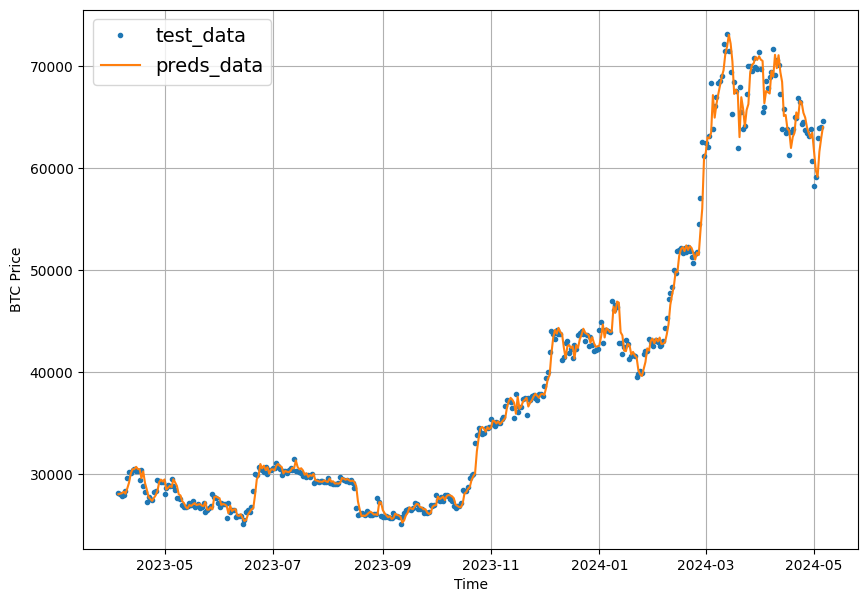

In [ ]:
offset = 300
plt.figure(figsize=(10,7))

# Account for test windows
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label="test_data")

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_2_preds,
                 start=offset,
                 format='-',
                 label="preds_data")


## Model 3: Dense(window=30, horizon=7)

In [ ]:
# Changing the horizon to 7
WINDOW_SIZE=30
HORIZON=7

# Creating windows and horizon
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)

len(full_windows), len(full_labels)

(3484, 3484)

In [ ]:
# Split the data into train and test set
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels,
                                                                                test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2787, 697, 2787, 697)

In [ ]:
train_windows[:2], train_labels[:2]

(array([[457.334015, 424.440002, 394.79599 , 408.903992, 398.821014,
         402.152008, 435.790985, 423.204987, 411.574005, 404.424988,
         399.519989, 377.181   , 375.46701 , 386.944   , 383.61499 ,
         375.071991, 359.511993, 328.865997, 320.51001 , 330.07901 ,
         336.187012, 352.940002, 365.026001, 361.562012, 362.299011,
         378.549011, 390.414001, 400.869995, 394.77301 , 382.556   ],
        [424.440002, 394.79599 , 408.903992, 398.821014, 402.152008,
         435.790985, 423.204987, 411.574005, 404.424988, 399.519989,
         377.181   , 375.46701 , 386.944   , 383.61499 , 375.071991,
         359.511993, 328.865997, 320.51001 , 330.07901 , 336.187012,
         352.940002, 365.026001, 361.562012, 362.299011, 378.549011,
         390.414001, 400.869995, 394.77301 , 382.556   , 383.757996]]),
 array([[383.757996, 391.441986, 389.54599 , 382.845001, 386.475006,
         383.15799 , 358.416992],
        [391.441986, 389.54599 , 382.845001, 386.475006, 383.1579

In [ ]:
tf.random.set_seed(42)

# Create model
model_3 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON)
], name="model_3_dense")

# Compile the model
model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# Fit the model
model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_3.name)])


In [ ]:
# Let's evaluate
model_3.evaluate(test_windows, test_labels)

22/22 [==============================] - 0s 3ms/step - loss: 1334.3046 - mae: 1334.3046


[1334.3045654296875, 1334.3045654296875]

In [ ]:
# Load the best performing model
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense")
model_3.evaluate(test_windows, test_labels)

22/22 [==============================] - 0s 2ms/step - loss: 1252.0248 - mae: 1252.0248


[1252.0247802734375, 1252.0247802734375]

In [ ]:
model_3_preds = make_preds(model_3,
                           input_data=test_windows)

model_3_results = evaluate_preds(tf.squeeze(test_labels), model_3_preds)


22/22 [==============================] - 0s 4ms/step


our model 3 results looks like arrayed shape numpers, AKA the prediced numbers
not the dictionary of evaluation, so do make it eligible, we will bring little change into our `evaluate_preds()` function

In [ ]:
# Creating a function to evaluate the metrics

def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for for different sized metrics (for longer horizons, we want to reduce metrics to a single value)
  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}




In [ ]:
# Get model_3 results aggregated to single values
model_3_results = evaluate_preds(tf.squeeze(test_labels), model_3_preds)
model_3_results

{'mae': 1252.0248,
 'mse': 3942309.2,
 'rmse': 1450.5485,
 'mape': 4.005409,
 'mase': 2.1110446}

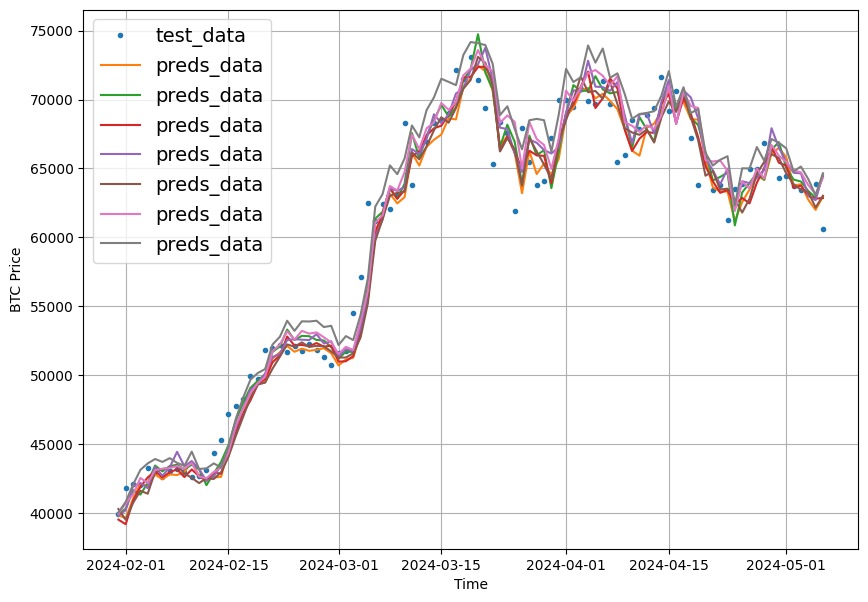

In [ ]:
offset = 600
plt.figure(figsize=(10,7))

# Account for test windows
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label="test_data")

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_3_preds,
                 start=offset,
                 format='-',
                 label="preds_data")


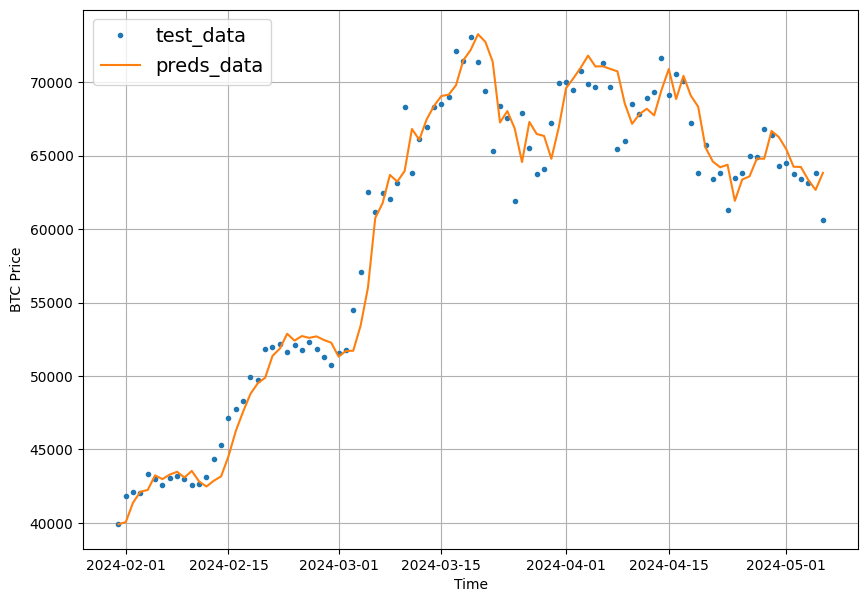

In [ ]:
offset = 600
plt.figure(figsize=(10,7))

# Account for test windows
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label="test_data")

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=tf.reduce_mean(model_3_preds, axis=1),
                 start=offset,
                 format='-',
                 label="preds_data")


### Demo Model for experiments(Like changing dense and layers numbers)

In [ ]:
# tf.random.set_seed(42)

# # Create model
# model_demo = tf.keras.Sequential([
#     layers.Dense(512, activation='relu'),
#     layers.Dense(256),
#     layers.Dense(128),
#     layers.Dense(64),
#     layers.Dense(HORIZON)
# ], name="model_demo")

# # Compile the model
# model_demo.compile(loss="mae",
#                 optimizer=tf.keras.optimizers.Adam(),
#                 metrics=["mae"])

# # Fit the model
# model_demo.fit(train_windows,
#             train_labels,
#             batch_size=128,
#             epochs=100,
#             verbose=0,
#             validation_data=(test_windows, test_labels),
#             callbacks=[create_model_checkpoint(model_demo.name)])


In [ ]:
# # Let's evaluate
# model_demo.evaluate(test_windows, test_labels)

In [ ]:
# # Load the best performing model
# model_demo = tf.keras.models.load_model("model_experiments/model_demo")
# model_demo.evaluate(test_windows, test_labels)

<Axes: >

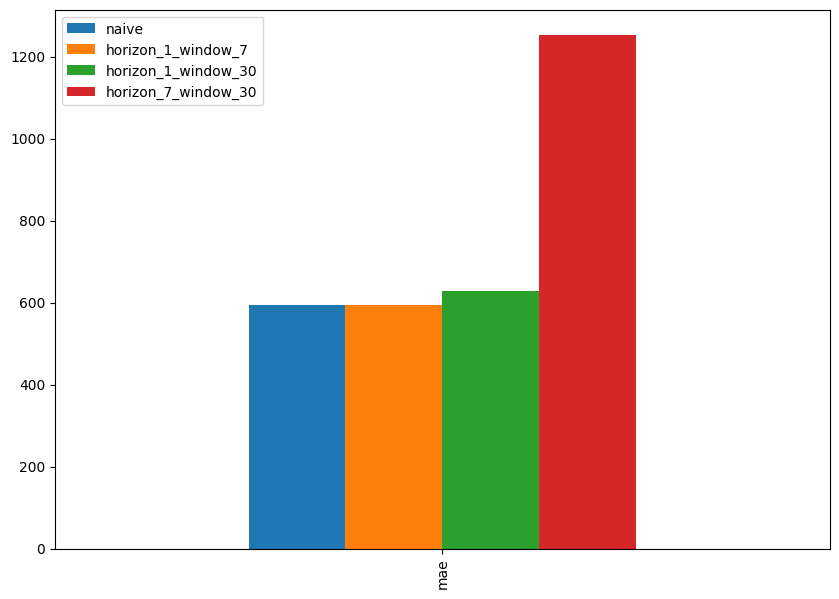

In [ ]:
# Comparing our models through barchart
import seaborn as sns

pd.DataFrame({"naive": naive_results,
                               "horizon_1_window_7": model_1_results['mae'],
                               "horizon_1_window_30": model_2_results['mae'],
                               "horizon_7_window_30": model_3_results['mae']}, index=['mae']).plot(kind='bar', figsize=(10,7))

## Model 4: Conv1D

In [ ]:
HORIZON=1
WINDOW_SIZE=7

# Create windowed data
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(3513, 3513)

In [ ]:
# Create train test splits
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels,
                                                                                test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2810, 703, 2810, 703)

To use the Conv1D layer we need an input shape of : `(batch_size, time_steps, input_dim)`, however our data isn't in that shape yet

In [ ]:
# Before we pass to the data the conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
x


<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([457.334015, 424.440002, 394.79599 , 408.903992, 398.821014,
       402.152008, 435.790985])>

In [ ]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))

In [ ]:
# test our our lambda layer
print(f"Original Shape: {x.shape}") # WINDOW_SIZE
print(f"Expanded Share: {expand_dims_layer(x).shape}")# Output...?
print(f"Original values with expanded shape: \n {expand_dims_layer(x)}")

Original Shape: (7,)
Expanded Share: (7, 1)
Original values with expanded shape: 
 [[457.334]
 [424.44 ]
 [394.796]
 [408.904]
 [398.821]
 [402.152]
 [435.791]]


In [ ]:
tf.random.set_seed(42)

# Create Conv1D model
model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    layers.Conv1D(filters=128, kernel_size=7, strides=1,padding='causal', activation="relu"),
    layers.Dense(HORIZON)
], name='model_4_Conv1D')

# Compile the model
model_4.compile(loss='mae',
                optimizer = tf.keras.optimizers.Adam())

# Fit the model
model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data= (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_4.name)])

In [ ]:
model_4.summary()

Model: "model_4_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            6400      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 6529 (25.50 KB)
Trainable params: 6529 (25.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Evaluate model
model_4.evaluate(test_windows, test_labels)

22/22 [==============================] - 0s 5ms/step - loss: 591.6242


591.6242065429688

In [ ]:
# Load the best performing model
model_4 = tf.keras.models.load_model("model_experiments/model_4_Conv1D")
model_4.evaluate(test_windows, test_labels)

22/22 [==============================] - 0s 3ms/step - loss: 591.6242


591.6242065429688

In [ ]:
# make predictions
model_4_preds = make_preds(model_4, test_windows)

22/22 [==============================] - 0s 3ms/step


In [ ]:
# Evaluate preds
model_4_results = evaluate_preds(tf.squeeze(test_labels),
                                 model_4_preds)
model_4_results

{'mae': 591.6242,
 'mse': 982663.4,
 'rmse': 991.29376,
 'mape': 1.8319417,
 'mase': 0.99368054}

In [ ]:
model_1_results

{'mae': 593.0861,
 'mse': 987310.6,
 'rmse': 993.6351,
 'mape': 1.8394638,
 'mase': 0.99613595}

## Model 5: RNN (LSTM)

Let's build the `Long Short Term Memory Model` time series

We will build upon same data as peviously used


In [ ]:
# Let's build an LSTM with functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
# x = layers.LSTM(128, return_sequences=True)(x)
x = layers.LSTM(128, activation='relu')(x)
# x = layers.Dense(32, activation='relu')(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_LSTM")

# Compile the model
model_5.compile(loss='mae',
                optimizer = tf.keras.optimizers.Adam())

# Fit the model
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=1,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_5.name)]
            )

Epoch 1/100
22/22 [==============================] - 3s 77ms/step - loss: 9217.8184 - val_loss: 14628.3271
Epoch 2/100
22/22 [==============================] - 1s 67ms/step - loss: 2703.8208 - val_loss: 2234.2288
Epoch 3/100
22/22 [==============================] - 1s 70ms/step - loss: 835.2917 - val_loss: 1320.9116
Epoch 4/100
22/22 [==============================] - 2s 85ms/step - loss: 665.6113 - val_loss: 1110.1208
Epoch 5/100
22/22 [==============================] - 1s 68ms/step - loss: 655.6929 - val_loss: 1109.7219
Epoch 6/100
22/22 [==============================] - 0s 6ms/step - loss: 630.4474 - val_loss: 1204.9150
Epoch 7/100
22/22 [==============================] - 2s 85ms/step - loss: 647.7973 - val_loss: 1103.0101
Epoch 8/100
22/22 [==============================] - 2s 92ms/step - loss: 645.8611 - val_loss: 1081.5736
Epoch 9/100
22/22 [==============================] - 1s 65ms/step - loss: 636.3560 - val_loss: 1070.4098
Epoch 10/100
22/22 [==============================] -

In [ ]:
# Load our best performing model
model_5 = tf.keras.models.load_model("model_experiments/model_5_LSTM")
model_5.evaluate(test_windows, test_labels)

22/22 [==============================] - 0s 3ms/step - loss: 620.0511


620.0511474609375

In [ ]:
# Make predictions with our LSTM
model_5_preds = make_preds(model_5, test_windows)


22/22 [==============================] - 0s 3ms/step


In [ ]:
model_5_results = evaluate_preds(tf.squeeze(test_labels),
                                 model_5_preds)
model_5_results

{'mae': 620.051,
 'mse': 1049301.6,
 'rmse': 1024.3542,
 'mape': 1.9330949,
 'mase': 1.0414257}

## Make a Multivariate Time Series Dataset

Before we add a feature to time series, What is a feature we can use?

One feature we could add is whether or not Elon Musk tweeted on that day...

* day 1 - 0
* day 2 - 1
* day 3 - 0
* day 4 - 0
* and so on....

What's a better feature to use?

How about halving events?


In [ ]:
# Let's make a multivariate time series
bitcoin_prices.head()

,Price
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


In [ ]:
# Let's add the bitcoin events to our dataset
block_reward_1 = 50 # 3 January 2009 - this block reward isnt in our dataset (our starts from September 2014)
block_reward_2 = 25 # 8 November 2012 -
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 18 May 2020

# Block reward Dates
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")


In [ ]:
block_reward_2_datetime

numpy.datetime64('2012-11-28')

In [ ]:
# Create date ranges of where specific block_reward values should be
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(661, 2070)

In [ ]:
# Add in a block reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Add in block reward values as a feature to our dataframe
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4


In [ ]:
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2024-05-02,59123.433594,6.25
2024-05-03,62889.835938,6.25
2024-05-04,63891.472656,6.25
2024-05-05,64031.132813,6.25
2024-05-06,64601.843750,6.25


<Axes: xlabel='Date'>

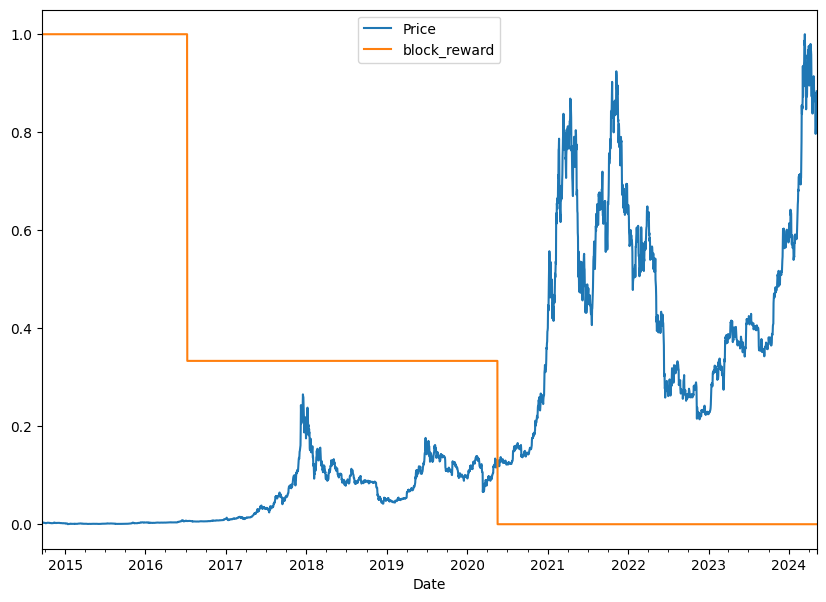

In [ ]:
# Plot the block reward vs price over time
from sklearn.preprocessing import MinMaxScaler, minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]),
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7))

## Making a windowed dataset with pandas

Previously we've turned our univariate time series into windowed dataset using the helper funcitons above.

However, since we've got mulitivariate data, these functions won't work

Not to worry, we can use the pandas.DataFrame.shit() method to window our multivariate data.



In [ ]:
# Setup dataset hyperparameters
HORIZON= 1
WINDOW_SIZE= 7


In [ ]:
# Make a copy bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

In [ ]:
# Add windowed columns
for i in range(WINDOW_SIZE):
  bitcoin_prices_windowed[f"Price{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)

bitcoin_prices_windowed.head()

,Price,block_reward,Price1,Price2,Price3,Price4,Price5,Price6,Price7
Date,,,,,,,,,
2014-09-17,457.334015,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,424.440002,25,457.334015,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,394.795990,25,424.440002,457.334015,NaN,NaN,NaN,NaN,NaN
2014-09-20,408.903992,25,394.795990,424.440002,457.334015,NaN,NaN,NaN,NaN
2014-09-21,398.821014,25,408.903992,394.795990,424.440002,457.334015,NaN,NaN,NaN


What we've done is created a way to window our dataset directly from a pandas dataframe.

```
[0, 1, 2, 3, 4, 5, 6, block_reward] -> [7]
[1, 2, 3, 4, 5, 6, 7, block_reward] -> [8]
[2, 3, 4, 5, 6, 7, 8, block_reward] -> [9]


In [ ]:
# Create and X windows y horizon features
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price1,Price2,Price3,Price4,Price5,Price6,Price7
Date,,,,,,,,
2014-09-24,25.0,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002,457.334015
2014-09-25,25.0,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002
2014-09-26,25.0,411.574005,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990
2014-09-27,25.0,404.424988,411.574005,423.204987,435.790985,402.152008,398.821014,408.903992
2014-09-28,25.0,399.519989,404.424988,411.574005,423.204987,435.790985,402.152008,398.821014


In [ ]:
y

Date
2014-09-24      423.204987
2014-09-25      411.574005
2014-09-26      404.424988
2014-09-27      399.519989
2014-09-28      377.181000
                  ...     
2024-05-02    59123.433594
2024-05-03    62889.835938
2024-05-04    63891.472656
2024-05-05    64031.132812
2024-05-06    64601.843750
Name: Price, Length: 3513, dtype: float32

In [ ]:
# Make train test splits
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2810, 2810, 703, 703)

In [ ]:
y_train

Date
2014-09-24      423.204987
2014-09-25      411.574005
2014-09-26      404.424988
2014-09-27      399.519989
2014-09-28      377.181000
                  ...     
2022-05-30    31726.390625
2022-05-31    31792.310547
2022-06-01    29799.080078
2022-06-02    30467.488281
2022-06-03    29704.390625
Name: Price, Length: 2810, dtype: float32

## Model 6: Dense( Multivariate )

In [ ]:
# set random seed for reproducible results as possible
tf.random.set_seed(42)


# 1. Create a model
model_6 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"), # linear activation is the as no activation
    # layers.Dense(128, activation="relu"), # linear activation is the as no activation
    layers.Dense(HORIZON, activation="linear")
],  name = "model_6_dense")#Name our model so we can save it

# 2. Compile the model
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

# 3. Fit the model
model_6.fit(x=X_train,
            y=y_train,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

Epoch 1/100
22/22 [==============================] - 2s 47ms/step - loss: 5861.4395 - mae: 5861.4395 - mse: 147045648.0000 - val_loss: 5856.1631 - val_mae: 5856.1631 - val_mse: 44950860.0000
Epoch 2/100
22/22 [==============================] - 1s 34ms/step - loss: 1221.6003 - mae: 1221.6003 - mse: 6416153.0000 - val_loss: 1705.0795 - val_mae: 1705.0795 - val_mse: 5561356.5000
Epoch 3/100
22/22 [==============================] - 1s 29ms/step - loss: 799.3556 - mae: 799.3556 - mse: 2927198.7500 - val_loss: 1269.2332 - val_mae: 1269.2332 - val_mse: 3713329.2500
Epoch 4/100
22/22 [==============================] - 1s 24ms/step - loss: 707.1919 - mae: 707.1919 - mse: 2265229.7500 - val_loss: 1171.6997 - val_mae: 1171.6997 - val_mse: 3222785.5000
Epoch 5/100
22/22 [==============================] - 1s 37ms/step - loss: 666.9124 - mae: 666.9124 - mse: 2026219.6250 - val_loss: 1105.0964 - val_mae: 1105.0964 - val_mse: 2844837.0000
Epoch 6/100
22/22 [==============================] - 1s 34ms/st

In [ ]:
# Load the best performing model
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense")
model_6.evaluate(X_test, y_test)

22/22 [==============================] - 0s 4ms/step - loss: 595.3339 - mae: 595.3339 - mse: 998000.0625


[595.3339233398438, 595.3339233398438, 998000.0625]

In [ ]:
# Make predictions with multivariate models
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

22/22 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([29738.297, 30017.72 , 29818.379, 31117.797, 31292.594, 30397.729,
       30023.96 , 29166.953, 28506.963, 26848.871], dtype=float32)>

In [ ]:
# Evaluate predictions to get eval
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 595.3339,
 'mse': 998000.2,
 'rmse': 998.9996,
 'mape': 1.8416073,
 'mase': 0.9999113}

In [ ]:
model_1_results

{'mae': 593.0861,
 'mse': 987310.6,
 'rmse': 993.6351,
 'mape': 1.8394638,
 'mase': 0.99613595}

## Model 7: N-BEATS alogrithm

 Let's now try build the biggest baddest (though maybe not baddest, as in, it may perform well..) time series forecasting model we've built so far.

 More specifically, we're going to be replicating the algorithm in Figure 1 from the following paper: https://arxiv.org/pdf/1905.10437

 Why?

 * This will allow us to practice replicating a paper with TensorFlow code
 * We will see how to use TensorFlow layer subclassing (to make our own custom layers)
 * Get experience using the Functional API to create custom architechture
 * Potentially get state of the art results on our problem

### Building and testing the N-BEATS block layer

Because the N-BEATS block layer doesn't exist in TensorFlow, we've got to create it.

To create custom layers and models in TensorFlow we can use subclassing

In [ ]:
# Create N-BEATSblock custom layer
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all the arguments for the parent class e.g (input_shape, trainable, name..etc)

    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation='relu') for _ in range(n_layers)]
    # Output of block is theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation='linear', name='theta')

  def call(self, inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)
    # Output the backcast and the forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]

    return backcast, forecast

Let's test our N-BEATS class.

To do we'll make some dummy inputs and outputs.

In [ ]:
tf.random.set_seed(42)
# Set up dummy NBeatsBlock layer to represent inputs and outputs
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [ ]:
# Create dummy inputs (have to be same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) # Input shape to the model reflect dense layer input requirements (ndim=2)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
# Pass dummy inputs to dummy NBEATSBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)

# These are the activation outputs of the theta layer (the'll be random due to no training of the model)

print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")


Backcast: [ 0.605402   -0.930433   -0.10428244 -0.19515377  0.03572918 -0.3429241
  0.39446604]
Forecast: 0.1990816295146942


### Preparing data for N-BEATS algorithm using `tf.data`

To make our input data load as fast as possible we're going to be adhering to the performant data pipeline steps in the tf.data.guid

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7


In [ ]:
# Create N-BEATS data inputs (N-BEATS works with univariate time series)
bitcoin_prices.head()

,Price
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


In [ ]:
# Add a windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()

for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)

bitcoin_prices_nbeats.head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2014-09-17,457.334015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,424.440002,457.334015,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,394.795990,424.440002,457.334015,NaN,NaN,NaN,NaN,NaN
2014-09-20,408.903992,394.795990,424.440002,457.334015,NaN,NaN,NaN,NaN
2014-09-21,398.821014,408.903992,394.795990,424.440002,457.334015,NaN,NaN,NaN


In [ ]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# Train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2810, 2810, 703, 703)

In [ ]:
# Time to make our dataset performant using tf.data API
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# Combine labels and features by zipping together --> (features, labels)
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# Batch and prefetch
BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [ ]:
train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

### Setting up hyperparameters for N-BEATS algorithm

In [ ]:
# Values from N-BEATS paper
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30
INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

### Getting ready for residual connections

Before we can craft our N-BEATS model, we need two layers for the residual connections (substract and add)

The N-BEATS algorithm uses double residual stacking to help train its deeper architecture (section:3.2 of N-BEATS paper).

In [ ]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])

print(f"Input_tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Add: {added.numpy()}")

Input_tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Add: [10 12 14 16 18 20 22 24 26 28]


### Building compiling and fitting the N-BEATS algorithm

1. Setup an instance of of the N-BEATS block layer using `NBeatsBlock()` (this will be the initial block used for the network, the rest will be created as part of stacks)
2. We need to create an input layer for N-BEATS stack (we'll be using the Keras Functional API)
3. Make the initial backcast and forecast for the model with the layer created in (1)
4. Use the for loop to create stacks of block layer
5. use the `NBeatsBlock()` class within the for loop in (4) to create blocks which return backcasts and block-level forecasts
6. Create the double residual stacking using substract and add layers
7. put the model inputs and outputs together using `tf.keras.Model()`
8. Compile the model with MAE loss (the paper uses multiple losses but we'll use MAE to keep it inline with our other models) and Adam optimizer with default setting as per section 5.2 of N-BEATS paper.
9. Fit the N-BEATS model for 500 epochs and since it's fitting for so many epochs, we'll use a couple of callbacks:
  * Early Stopping - Because the model will be training for so long, we'll stop it early if it stops improving.
  * Reduce LR on Plateau - if a model stops improving try to lower the learning to reduce the amount it updates its weights each time (take smaller steps towards best performance)



In [ ]:
%%time

tf.random.set_seed(42)

# 1. Setup and instance of NBeatsBlock
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Create an input to stacks
stack_input = layers.Input(shape=(INPUT_SIZE), name='stack_input')

# 3. Create initial backcast and forecast input (backwards prediction + horizon prediction)
residuals, forecast = nbeats_block_layer(stack_input)

# 4. Create stacks of block layers
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already created in 3

  # 5. Use NBeatsBlock class to calculate the backcast as well as forecast
  backcast, block_forecast = NBeatsBlock(
  input_size = INPUT_SIZE,
  theta_size = THETA_SIZE,
  horizon = HORIZON,
  n_neurons = N_NEURONS,
  n_layers = N_LAYERS,
  name=f"NBeatsBlock_{i}"
  )(residuals)# pass in the redisual

  # 6. Create double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the stack model
model_7 = tf.keras.Model(inputs=stack_input, outputs=forecast, name="model_7_NBEATS")

# 8. Compile the model with MAE loss
model_7.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam())

# 9. Fit the model with Earlystopping and ReduceLROnPlateau callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                        patience=200,
                                                        restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                            patience=100,
                                                            verbose=1)])


Epoch 543: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 1157: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 1257: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
CPU times: user 7min 1s, sys: 19.2 s, total: 7min 20s
Wall time: 10min 29s


In [ ]:
# Evaluate N-beats model on the test dataset
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 26ms/step - loss: 587.8596


587.8595581054688

In [ ]:
# Make predictions with N-Beats model
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:5]

1/1 [==============================] - 2s 2s/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([29706.514, 29857.256, 29911.209, 31159.777, 31250.963],
      dtype=float32)>

In [ ]:
# Evaluate N-Beats model preds
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)

model_7_results

{'mae': 587.85956,
 'mse': 974297.2,
 'rmse': 987.06494,
 'mape': 1.8116504,
 'mase': 0.9873575}

### Plotting the N-BEATS architecture we've created

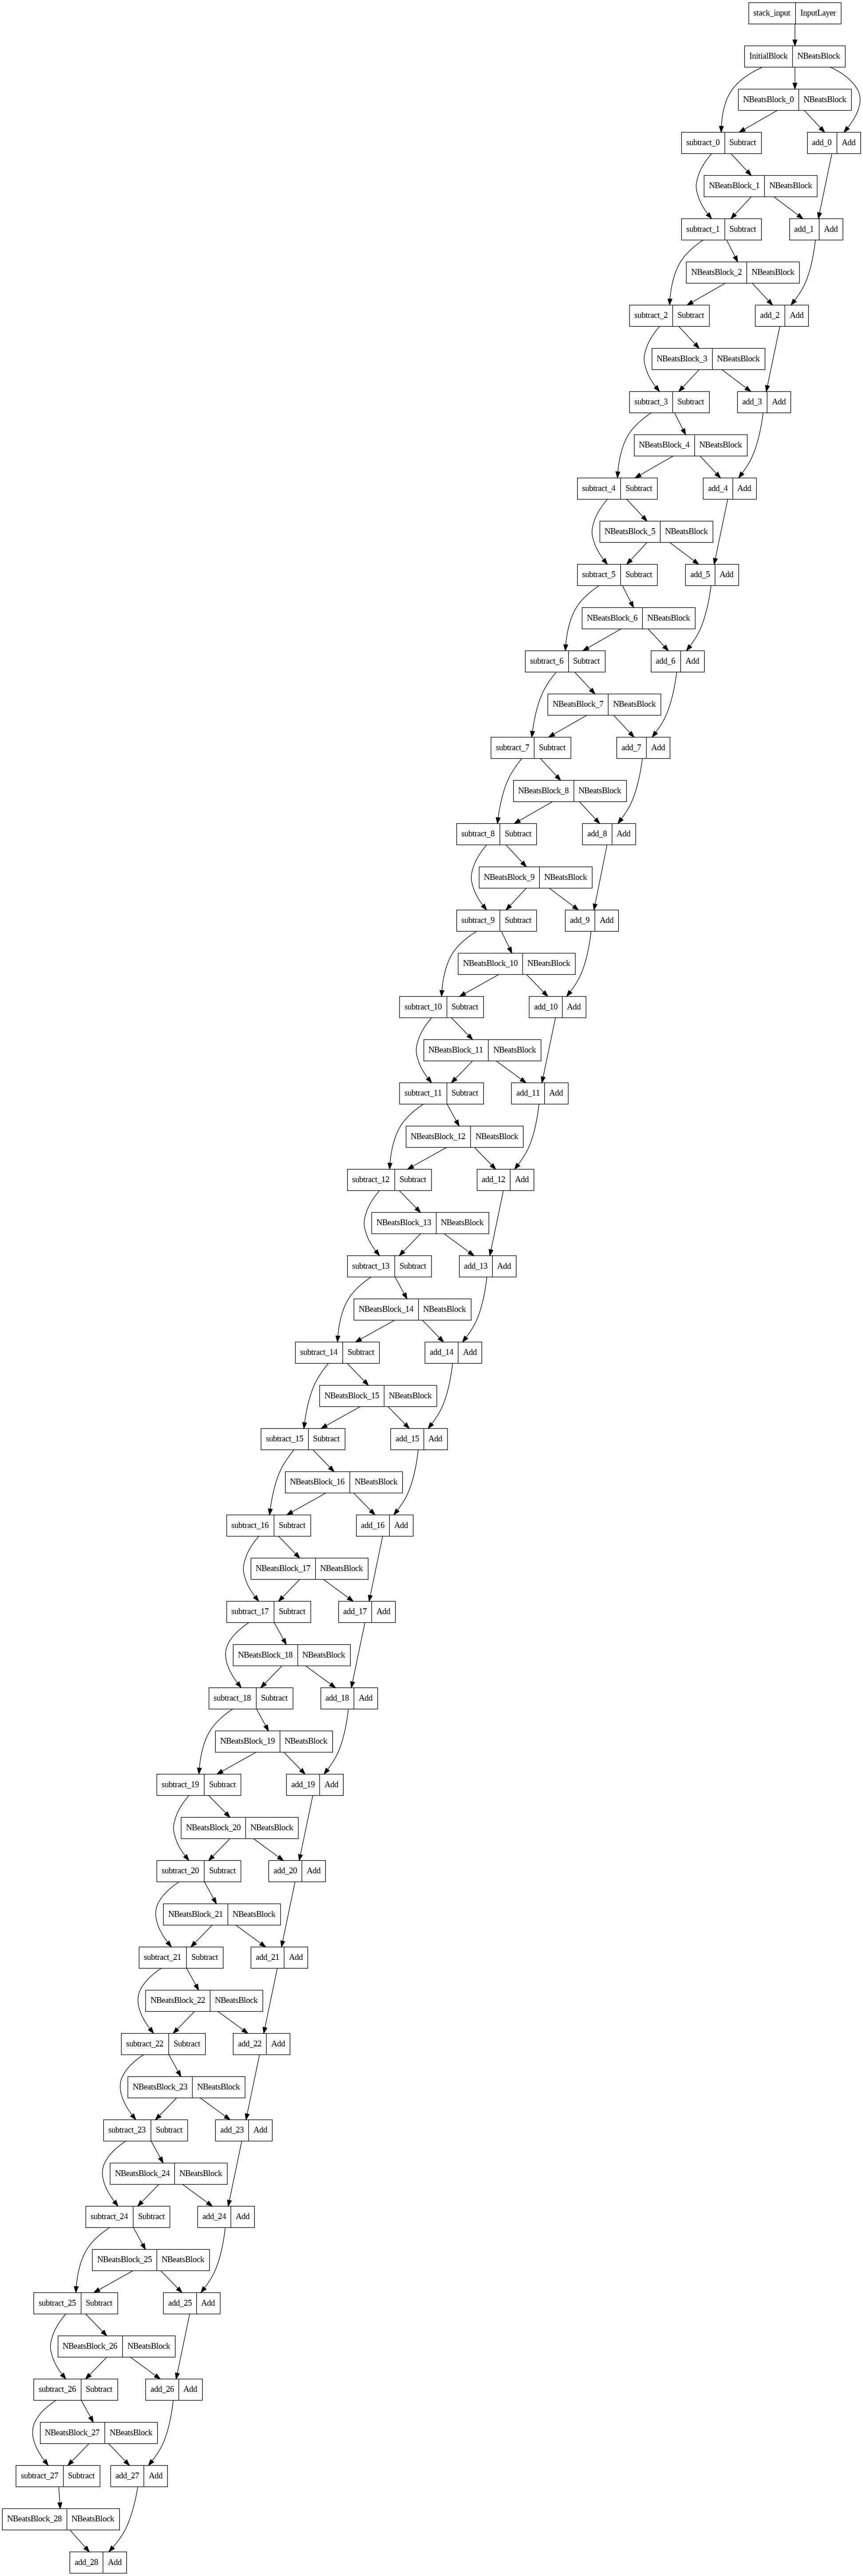

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_7)

## Model 8: Creating an ensemble (staking different models together)

An ensemble leverages the wisdom of the crowd effect.

It combines many *different* models to predict a common goal.

### Constructing and fitting and ensemble of models (using different loss functions)

In [ ]:
def get_ensemble_models(horizon=HORIZON,
                       train_data=train_dataset,
                       test_data=train_dataset,
                       num_iter=10,
                       num_epochs=1000,
                       loss_fns=["mae", "mse", "mape"]):
  """
  Returns a list of num_iter models each trained on MAE, and MAPE loss

  For example, if num_iter=10, a list of 30 trained models will be returned:
  10 * len(["mae","mse","mape"]) = 30, because we using 3 differend loss fucntions
  """

  # Make empty list for trained ensemble models
  ensemble_models=[]

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
          tf.keras.layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
          tf.keras.layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
          tf.keras.layers.Dense(HORIZON)
      ])

      # Compile simple modelwith current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])

      # Fit the model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])

      # Append fitted model to the list
      ensemble_models.append(model)

  return ensemble_models

In [ ]:
%%time

# Get list of a trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 808: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 775: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 875: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 132: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mae for 1000 epochs, model number: 1

Epoch 235: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mse for 1000 epochs, model number: 1

Epoch 468: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 568: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 1

Epoch 273: ReduceLROnPlateau reduci

In [ ]:
len(ensemble_models)

15

In [ ]:
ensemble_models

## Make predictions with our ensemble model

In [ ]:
# Create a function which uses list of trained models to make and return list of predictions
def make_ensemble_preds(ensemble_models, data):
    ensemble_preds=[]
    for model in ensemble_models:
        preds = model.predict(data)
        ensemble_preds.append(preds)

    return tf.constant(tf.squeeze(ensemble_preds))


In [ ]:
%%time
# Create a list of ensemble predictions

ensemble_preds = make_ensemble_preds(ensemble_models,
                                    test_dataset)

ensemble_preds

1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 36ms/step
CPU times: user 653 ms, sys: 27.3 ms, total: 681 ms
Wall time: 761 ms


<tf.Tensor: shape=(15, 703), dtype=float32, numpy=
array([[29785.016, 30221.936, 29830.602, ..., 62411.445, 63510.59 ,
        64003.44 ],
       [29725.533, 29971.658, 29849.38 , ..., 62820.63 , 63280.883,
        63622.9  ],
       [29655.58 , 29914.51 , 29877.104, ..., 62471.86 , 63748.695,
        64026.   ],
       ...,
       [29830.537, 29771.252, 29930.768, ..., 62113.848, 64247.14 ,
        64101.797],
       [29747.383, 29849.488, 29851.488, ..., 62282.387, 63859.63 ,
        64136.895],
       [29535.031, 29969.047, 29896.191, ..., 62639.75 , 63933.145,
        64279.285]], dtype=float32)>

In [ ]:
ensemble_preds

<tf.Tensor: shape=(15, 703), dtype=float32, numpy=
array([[29785.016, 30221.936, 29830.602, ..., 62411.445, 63510.59 ,
        64003.44 ],
       [29725.533, 29971.658, 29849.38 , ..., 62820.63 , 63280.883,
        63622.9  ],
       [29655.58 , 29914.51 , 29877.104, ..., 62471.86 , 63748.695,
        64026.   ],
       ...,
       [29830.537, 29771.252, 29930.768, ..., 62113.848, 64247.14 ,
        64101.797],
       [29747.383, 29849.488, 29851.488, ..., 62282.387, 63859.63 ,
        64136.895],
       [29535.031, 29969.047, 29896.191, ..., 62639.75 , 63933.145,
        64279.285]], dtype=float32)>

Our ensemble models come out in multiple directions but to combine into point prediction we can leverage the mean of all of the predictions or median

In [ ]:
ensemble_mean = tf.reduce_mean(ensemble_preds, axis=0)
ensemble_mean[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([29692.842, 29865.037, 29936.947, 31178.838, 31208.068, 30262.639,
       30102.242, 29093.527, 28444.299, 26951.715], dtype=float32)>

In [ ]:
ensemble_median = np.median(ensemble_preds, axis=0)
ensemble_median[:10]

array([29655.58 , 29855.246, 29887.354, 31199.643, 31192.496, 30274.447,
       30096.188, 29065.3  , 28470.762, 26946.916], dtype=float32)

In [ ]:
#predictions on ensemble mean
ensemble_results = evaluate_preds(y_true=y_test,
                                 y_pred=ensemble_mean)
ensemble_results

{'mae': 589.3591,
 'mse': 965344.06,
 'rmse': 982.5192,
 'mape': 1.8138922,
 'mase': 0.9898761}

In [ ]:
#predictions on enseble median
ensemble_results = evaluate_preds(y_true=y_test,
                                 y_pred=ensemble_median)
ensemble_results

{'mae': 589.9242,
 'mse': 964764.7,
 'rmse': 982.22437,
 'mape': 1.8160615,
 'mase': 0.99082524}

### Plotting the predictions intervals (uncertainty estimates) of our ensemble

So far we've been making points predictions with our models.

E.g horizon= 1, our model predicts tomorrow's price of Bitcoin will be $60,000USD

Wouldn't it be helpful if we knew a range of whether what prediction came from?

Instead of 60,000 USD on the dot, how about 48,000 to 52,000 USD?

To get the 95% confidence prediction intervals for a deep learning model is the bootstrap method:
1. Take the predictions from a number of randomly initiliazed models  (we've got this thanks to our ensemble models)
2. Measure the standard deviation of the predictions
3. Multiply the standard deviation by 1.96 (assuming the distribution is Gaussian/Normal, 95% of observations fall within 1.96 standard deviations of them)
4. To get the prediction interval upper and lower bounds, add and subtract the value obtained in (3) to the mean/median of the predictions made in (1)

In [ ]:
# Find the upper and lower bounds in our predictions
def get_upper_lower(preds): # 1. Take the predictions from a number of randomaly initialized models
    # 2. Measure the standard deviation of the predictions
    std = tf.math.reduce_std(preds, axis=0)

    # 3. Multiply the standard deviation by 1.96
    interval = 1.96 * std

    # 4. Get the predicitons upper and lower bounds
    preds_mean = tf.reduce_mean(preds, axis=0)
    lower, upper = preds_mean - interval, preds_mean + interval

    return lower, upper

In [ ]:
# Get the upper and lower bounds of the 95% percent prediction interval
lower, upper = get_upper_lower(preds=ensemble_preds)
lower, upper

(<tf.Tensor: shape=(703,), dtype=float32, numpy=
 array([29323.193, 29566.133, 29719.783, 30975.475, 30969.922, 30020.744,
        29879.654, 28839.09 , 28200.354, 26684.807, 22307.994, 21690.373,
        21242.578, 19494.414, 19419.79 , 18152.71 , 20029.209, 20060.607,
        20097.512, 19841.3  , 20728.023, 21105.393, 21372.965, 20867.438,
        20531.783, 20199.6  , 19983.746, 19684.781, 19150.117, 19123.88 ,
        19143.752, 20056.914, 20069.63 , 20473.4  , 21518.9  , 21648.697,
        21495.768, 20700.225, 19861.188, 19229.617, 19969.252, 20353.924,
        20579.21 , 21091.404, 20581.717, 22329.92 , 23252.83 , 23088.209,
        22948.64 , 22467.92 , 22325.592, 22488.299, 21224.734, 21170.898,
        22477.014, 23512.805, 23621.852, 23451.861, 23108.389, 23198.066,
        22872.102, 22749.031, 22512.303, 23123.715, 22802.445, 23065.293,
        23634.684, 22934.701, 23783.885, 23750.7  , 24246.146, 24309.146,
        24134.24 , 23988.33 , 23740.975, 23233.354, 23092.555, 

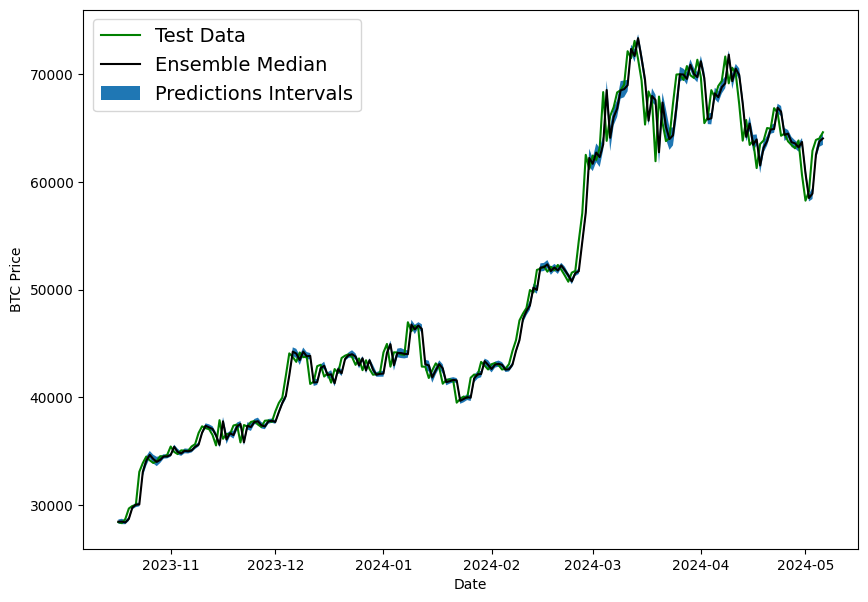

In [ ]:
# Get the median/mean values of of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)

# Plot the median of our ensemble preds along with the prediction intervals (where the predictions falls between)
offset=500
plt.figure(figsize=(10,7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
# To plot the upper and lower bounds, let's fill between
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label="Predictions Intervals")
plt.legend(loc="upper left", fontsize=14)

hmmm..

So far all of our models perdictions have been lagging behind the test data...

As if they're replicating what the naive model does and just predict the previous timestep.

> **Note:** These predictions intervals are estimates itself
themselves. And they have been created with the assumption that our model's data is from a normal distribution

## Aside: Two types of uncertainty (coconut and subway)

Uncertainty estimates in machine learning seek out to qualitively and quantitively answer the questions:
1. What can my model know? (with perfect data, what's possible for a model to learn?)
2. What doesn't my model know? (what can a model never predict? Or would it be helpful if a model could tell you that when it's making a prediction, it doesn't actually know if it's right or not?)

There are two Major types of uncertainty in machine learning you should know about:
* **Aleatoric uncertainty** - this type of uncertainty cannot be reduced and it is often referred as "data" uncertainty or "subway" uncertainty.

* **Epistemic uncertainty** - this type of uncertainty can be reudced, it also referred to as "model" or "coconut" uncertainty.

## Model 9: Train a model on the full historical data to make predictions into the future

So far all of our models have predicted on the test dataset,
however, this is only a psuedo future.

Let's now build a model which is capable of predicting into the future.


In [ ]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price1,Price2,Price3,Price4,Price5,Price6,Price7
Date,,,,,,,,,
2014-09-17,457.334015,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,424.440002,25,457.334015,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,394.795990,25,424.440002,457.334015,NaN,NaN,NaN,NaN,NaN
2014-09-20,408.903992,25,394.795990,424.440002,457.334015,NaN,NaN,NaN,NaN
2014-09-21,398.821014,25,408.903992,394.795990,424.440002,457.334015,NaN,NaN,NaN


In [ ]:
bitcoin_prices_windowed.tail()

,Price,block_reward,Price1,Price2,Price3,Price4,Price5,Price6,Price7
Date,,,,,,,,,
2024-05-02,59123.433594,6.25,58254.011719,60636.855469,63841.121094,63113.230469,63419.140625,63755.320313,64481.707031
2024-05-03,62889.835938,6.25,59123.433594,58254.011719,60636.855469,63841.121094,63113.230469,63419.140625,63755.320313
2024-05-04,63891.472656,6.25,62889.835938,59123.433594,58254.011719,60636.855469,63841.121094,63113.230469,63419.140625
2024-05-05,64031.132813,6.25,63891.472656,62889.835938,59123.433594,58254.011719,60636.855469,63841.121094,63113.230469
2024-05-06,64601.843750,6.25,64031.132813,63891.472656,62889.835938,59123.433594,58254.011719,60636.855469,63841.121094


In [ ]:
# Train model on entire data to make predictions for the next day
X_all = bitcoin_prices_windowed.dropna().drop(["Price","block_reward"], axis=1).to_numpy()

# Get labels
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

len(X_all), len(y_all)

(3513, 3513)

In [ ]:
X_all[:5], y_all[:5]

(array([[435.790985, 402.152008, 398.821014, 408.903992, 394.79599 ,
         424.440002, 457.334015],
        [423.204987, 435.790985, 402.152008, 398.821014, 408.903992,
         394.79599 , 424.440002],
        [411.574005, 423.204987, 435.790985, 402.152008, 398.821014,
         408.903992, 394.79599 ],
        [404.424988, 411.574005, 423.204987, 435.790985, 402.152008,
         398.821014, 408.903992],
        [399.519989, 404.424988, 411.574005, 423.204987, 435.790985,
         402.152008, 398.821014]]),
 array([423.204987, 411.574005, 404.424988, 399.519989, 377.181   ]))

In [ ]:
# Turn data into efficient running tensors
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# Combine features and labels
dataset_all = tf.data.Dataset.zip(features_dataset_all, labels_dataset_all)

# Batch and prefetch for optimal performance
BATCH_SIZE = 1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [ ]:
tf.random.set_seed

# Create a model (nice and simple, just to test)
model_9 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
])

# Compile the model
model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())


# Fitting the model on of our data to make future forecasts
model_9.fit(dataset_all,
            epochs=100,
            verbose=0,
            )

### Make predictions into future

In [ ]:
# How many timestep to predict into the future?
INTO_FUTURE = 14


To make predictions into the future we want a function which:

1. Takes an input:
  * a list of values (Bitcoin historical data)
  * a trained model (such as `model_9`)
  * a window into the future to predict (our `INTO_FUTURE` variable)
  * the window size a model was trained on (`WINDOW_SIZE`) - the model can only predict on the same kind of data it was trained on
2. Creates an empty list for future forecasts  (this will be returned at the end of the end, when it's full of predictions) and extracts the last `WINDOW_SIZE` values from the input values
3. Loop `INTO_FUTURE` times making a prediciton on `WINDOW_SIZE` sequences which remove the first value and append the latest prediction

In [ ]:
WINDOW_SIZE

7

In [ ]:
HORIZON

1

In [ ]:
# 1. Create a function to predict into the future
def make_future_forecasts(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Make future forecasts into_future steps after values ends.

  Returns future forecasts as a list of floats.
  """
  # 2. Create an empty list for future forecasts/prepare data to forecast on
  future_forecast=[]
  last_window = values[-WINDOW_SIZE:]

  # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each time
  for _ in range (INTO_FUTURE):
    # predict on the last window then append it again, again (our model will eventually start to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on:\n {last_window} --> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window,future_pred)[-WINDOW_SIZE:]

  return future_forecast

In [ ]:
# Make forecast into the future
future_forecast = make_future_forecasts(values=y_all,
                                        model=model_9,
                                        into_future=INTO_FUTURE,
                                        window_size=WINDOW_SIZE)

1/1 [==============================] - 0s 47ms/step
Predicting on:
 [60636.855469 58254.011719 59123.433594 62889.835938 63891.472656
 64031.132813 64601.84375 ] --> Prediction: 59518.5703125

1/1 [==============================] - 0s 19ms/step
Predicting on:
 [58254.011719  59123.433594  62889.835938  63891.472656  64031.132813
 64601.84375   59518.5703125] --> Prediction: 58534.4765625

1/1 [==============================] - 0s 16ms/step
Predicting on:
 [59123.433594  62889.835938  63891.472656  64031.132813  64601.84375
 59518.5703125 58534.4765625] --> Prediction: 60091.47265625

1/1 [==============================] - 0s 18ms/step
Predicting on:
 [62889.835938   63891.472656   64031.132813   64601.84375
 59518.5703125  58534.4765625  60091.47265625] --> Prediction: 63479.8671875

1/1 [==============================] - 0s 16ms/step
Predicting on:
 [63891.472656   64031.132813   64601.84375    59518.5703125
 58534.4765625  60091.47265625 63479.8671875 ] --> Prediction: 63890.07421875

In [ ]:
bitcoin_prices_windowed.tail()

,Price,block_reward,Price1,Price2,Price3,Price4,Price5,Price6,Price7
Date,,,,,,,,,
2024-05-02,59123.433594,6.25,58254.011719,60636.855469,63841.121094,63113.230469,63419.140625,63755.320313,64481.707031
2024-05-03,62889.835938,6.25,59123.433594,58254.011719,60636.855469,63841.121094,63113.230469,63419.140625,63755.320313
2024-05-04,63891.472656,6.25,62889.835938,59123.433594,58254.011719,60636.855469,63841.121094,63113.230469,63419.140625
2024-05-05,64031.132813,6.25,63891.472656,62889.835938,59123.433594,58254.011719,60636.855469,63841.121094,63113.230469
2024-05-06,64601.843750,6.25,64031.132813,63891.472656,62889.835938,59123.433594,58254.011719,60636.855469,63841.121094


### Plot future forecasts

In [ ]:
future_forecast

[59518.57,
 58534.477,
 60091.473,
 63479.867,
 63890.074,
 63126.707,
 61558.664,
 58931.29,
 59165.28,
 61190.0,
 63585.535,
 63125.215,
 61593.508,
 59807.215]

In [ ]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values ranging from start_date to start_date+into_future
  """
  start_date = start_date + np.timedelta64(offset,"D") # Specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # Specify the end date

  return np.arange(start_date, end_date, dtype="datetime64[D]") # Return a date range between start and end date


In [ ]:
# Last timestep of timesteps (currently np.datetime64 format)
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2024-05-06 00:00:00')

In [ ]:
# Get the next two weeks of timesteps
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2024-05-07', '2024-05-08', '2024-05-09', '2024-05-10',
       '2024-05-11', '2024-05-12', '2024-05-13', '2024-05-14',
       '2024-05-15', '2024-05-16', '2024-05-17', '2024-05-18',
       '2024-05-19', '2024-05-20'], dtype='datetime64[D]')

In [ ]:
# Insert last time step/final_price into next time steps and future forecasts so the plot doesn't look junky
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
next_time_steps, future_forecast

(array(['2024-05-06', '2024-05-07', '2024-05-08', '2024-05-09',
        '2024-05-10', '2024-05-11', '2024-05-12', '2024-05-13',
        '2024-05-14', '2024-05-15', '2024-05-16', '2024-05-17',
        '2024-05-18', '2024-05-19', '2024-05-20'], dtype='datetime64[D]'),
 array([64601.844, 59518.57 , 58534.477, 60091.473, 63479.867, 63890.074,
        63126.707, 61558.664, 58931.29 , 59165.28 , 61190.   , 63585.535,
        63125.215, 61593.508, 59807.215], dtype=float32))

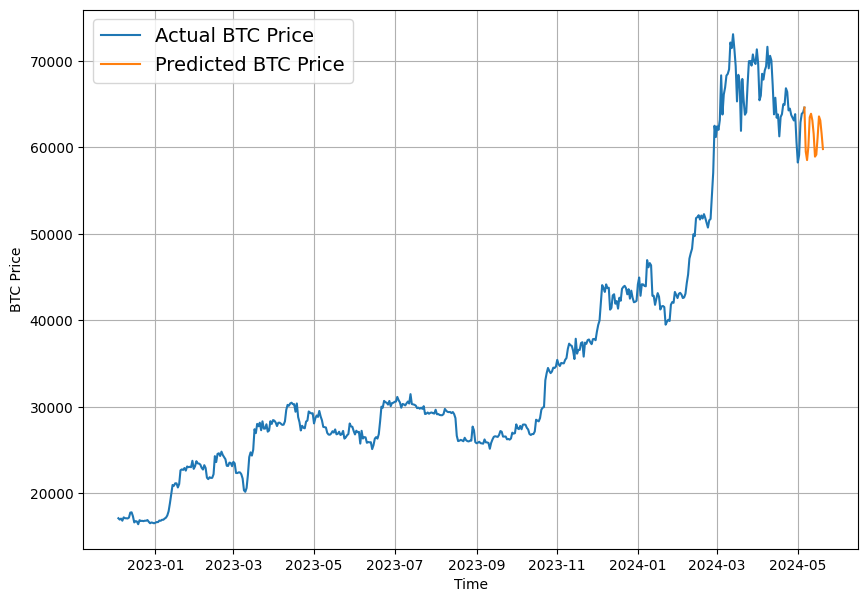

In [ ]:
# Plot future prices predictions of Bitcoin
plt.figure(figsize=(10,7))
plot_time_series(bitcoin_prices.index, btc_price, start=3000, format='-', label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format='-', label="Predicted BTC Price")

## Model 10: Why forecasting is BS (the turkey problem)

In [ ]:
# Let's introduce a turkey problem to our BTC data (price of BTC falls 100x in one day)

btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1] / 100

In [ ]:
# Manufacture an extra price on the end (to showcase our Turkey problem)
btc_price_turkey[-10:]

[63419.140625,
 63113.230469,
 63841.121094,
 60636.855469,
 58254.011719,
 59123.433594,
 62889.835938,
 63891.472656,
 64031.132813,
 646.0184375]

In [ ]:
# Get the timesteps for the turkey problem
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2024-04-27T00:00:00.000000000', '2024-04-28T00:00:00.000000000',
       '2024-04-29T00:00:00.000000000', '2024-04-30T00:00:00.000000000',
       '2024-05-01T00:00:00.000000000', '2024-05-02T00:00:00.000000000',
       '2024-05-03T00:00:00.000000000', '2024-05-04T00:00:00.000000000',
       '2024-05-05T00:00:00.000000000', '2024-05-06T00:00:00.000000000'],
      dtype='datetime64[ns]')

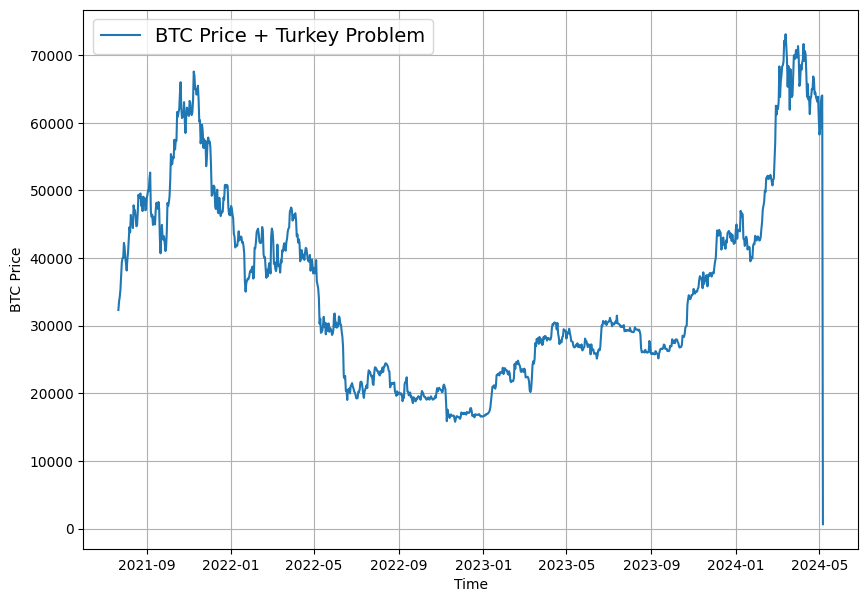

In [ ]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=btc_timesteps_turkey,
                 values=btc_price_turkey,
                 format="-",
                 label="BTC Price + Turkey Problem",
                 start=2500)

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

# Create train and test set for turkey problem data
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE, horizon=HORIZON)

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)

len(X_train), len(X_test), len(y_train), len(y_test)

(2810, 703, 2810, 703)

### Building a turkey model (model to predict turkey data)

In [ ]:
# Clone model 1 architecture for turkey model and fit the turkey model on the turkey data
turkey_model = tf.keras.models.clone_model(model_1)

turkey_model._name = "model_10_turkey_model"

# Compile the model
turkey_model.compile(loss="mae",
                     optimizer=tf.keras.optimizers.Adam())

# Fit the model
turkey_model.fit(X_train, y_train,
                 epochs=100,
                 verbose=0,
                 batch_size=128,
                 validation_data=(X_test, y_test),
                 callbacks=[create_model_checkpoint(turkey_model.name)])

In [ ]:
# Evaluate model on test data
turkey_model.evaluate(X_test, y_test)


22/22 [==============================] - 0s 2ms/step - loss: 681.9992


681.9992065429688

In [ ]:
# Best performing turkey model and evaluate on test data
turkey_model = tf.keras.models.load_model("model_experiments/model_10_turkey_model")
turkey_model.evaluate(X_test, y_test)

22/22 [==============================] - 0s 2ms/step - loss: 679.9976


679.9976196289062

In [ ]:
# Make predictions with turkey model
turkey_preds = make_preds(turkey_model, X_test)
turkey_preds[:10]


22/22 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([29838.492, 29830.021, 29915.814, 31129.893, 31312.703, 30358.66 ,
       30107.389, 29210.031, 28432.682, 26945.057], dtype=float32)>

In [ ]:
# Evalaute turkey preds
turkey_results = evaluate_preds(y_true=y_test,
                                y_pred=turkey_preds)
turkey_results

{'mae': 14428.283,
 'mse': 399629660.0,
 'rmse': 18830.541,
 'mape': 54.50762,
 'mase': 21.067314}

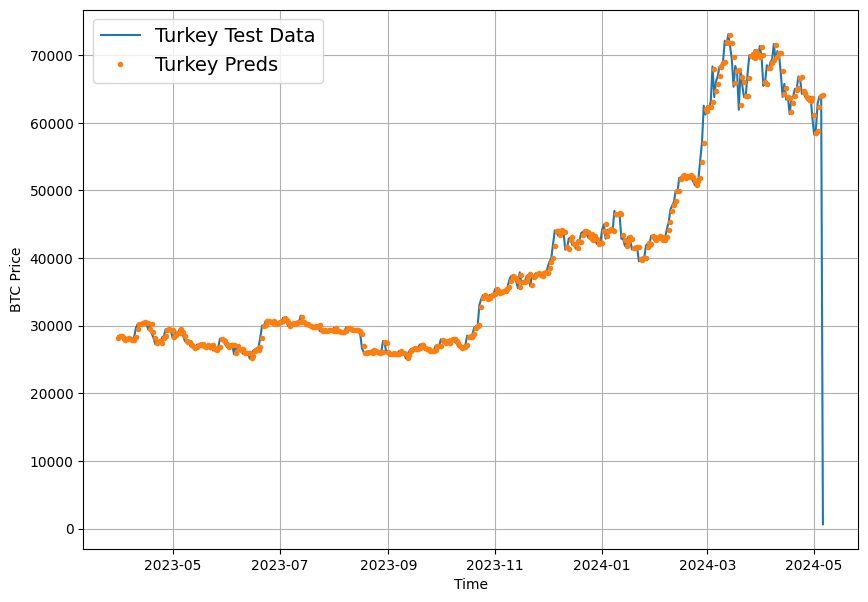

In [ ]:
plt.figure(figsize=(10, 7))
offset=300
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=btc_price_turkey[-len(y_test):],
                 format="-",
                 label="Turkey Test Data", start=offset)
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=turkey_preds,
                 label="Turkey Preds", start=offset)

## Compare models

In [ ]:
# Compare different model results (w = window, h = horizon, e.g w=7 mean window size of 7)

model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_30_h1": model_2_results,
                              "model_3_dense_30_7": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              "model_7_NBEATS": model_7_results,
                              "model_8_ensemble": ensemble_results,
                              "model_10_turkey": turkey_results}).T

model_results.head(10)


,mae,mse,rmse,mape,mase
naive_model,594.722656,9.915852e+05,995.783752,1.819741,0.998885
model_1_dense_w7_h1,593.086121,9.873106e+05,993.635071,1.839464,0.996136
model_2_dense_30_h1,628.014893,1.044760e+06,1022.135010,1.969523,1.054343
model_3_dense_30_7,1252.024780,3.942309e+06,1450.548462,4.005409,2.111045
model_4_CONV1D,591.624207,9.826634e+05,991.293762,1.831942,0.993681
model_5_LSTM,620.051025,1.049302e+06,1024.354248,1.933095,1.041426
model_6_multivariate,595.333923,9.980002e+05,998.999573,1.841607,0.999911
model_7_NBEATS,587.859558,9.742972e+05,987.064941,1.811650,0.987357
model_8_ensemble,589.924194,9.647647e+05,982.224365,1.816061,0.990825
model_10_turkey,14428.283203,3.996297e+08,18830.541016,54.507622,21.067314


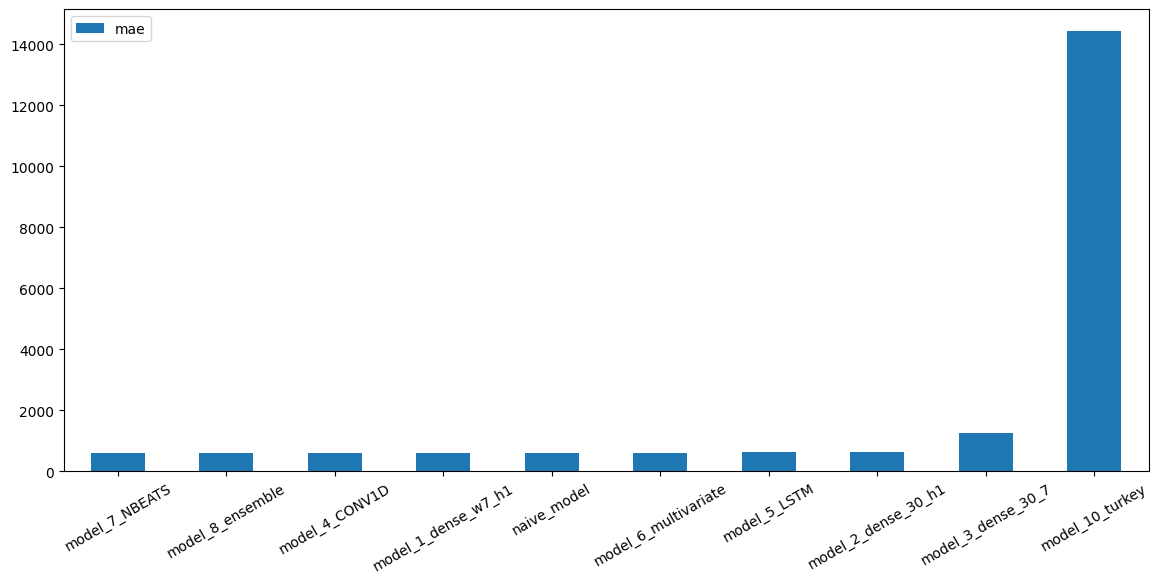

In [ ]:
# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by='mae').plot(figsize=(14,6), kind="bar")
plt.xticks(rotation=30);

## Summary

So far we trained 0 - 10 models with various methods and approach some of them were very similiar but some of them were distinct (e.g. NBEATS Algorithm).

We can say that it is not easy to predict on timeseries data due to `uncertainty`, but still we can use many other approaches to reduce  our models `MAE`.

There are two types of timeseries uncertainty:

1. **Aleatoric Uncertainty:** This type of uncertainty can't be reduced as it is referred as `data` or `subway` uncertainty.
(e.g. You can't predict a train arrival on exact time despite collecting more and more data still there will be aleatoric uncertainty "it can be late 1 min or arrive 2 min earlier")
2. **Epistemic Uncertainty:** This type of uncertainty can be reduced, it also referred to as "model" or "cocunut" uncertainty (e.g. going to a beach and estimating a cocunut falling on your head it can be reduced what if there is no tree of coconut the uncertainty reduced to almost zero).

So to keep in mind about uncertainty we can defintly say that it's hard to predict on open system timeseries data due to various of facts and uncertainty, but we can reduced the uncertainty on closed based system timeseries data (e.g. An organization data) the more we know about the data in closed based system the more we can reduce uncertainty.

> We can go for more techniques like to decrease `MAE`:

* Does scaling the data help for univariate/multivariate data? (e.g. getting all of the values between 0 & 1)
  * Try doing this for a univariate model (e.g. model_1) and a multivariate model (e.g. model_6) and see if it effects model training or evaluation results.

* Setup a series of experiments to find whether or not there's a better window size.
  * For example, you might train 10 different models with HORIZON=1 but with
  window sizes ranging from 2-1

* Create a windowed dataset just like the ones we used for model_1 using `tf.keras.preprocessing.timeseries_dataset_from_array()` and retrain model_1 using the recreated dataset.

* Make prediction intervals for future forecasts. To do so, one way would be to train an ensemble model on all of the data, make future forecasts with it and calculate the prediction intervals of the ensemble just like we did for `model_8`.

* For future predictions, try to make a prediction, retrain a model on the predictions, make a prediction, retrain a model, make a prediction, retrain a model, make a prediction (retrain a model each time a new prediction is made). Plot the results, how do they look compared to the future predictions where a model wasn't retrained for every forecast `(model_9)`?